# Funkcije

Sadržaj:
1. [Vrste funkcija](#Vrste-funkcija)
1. [Krive](#Krive)
1. [Površi](#Površi)
1. [Krive nivoa i konturni grafik](#Krive-nivoa-i-konturni-grafik)

In [1]:
import numpy as np
import matplotlib as mplb
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

## Vrste funkcija

U ovom odeljku upoznajemo sličnosti i razlike između funkcija kojima baratamo. U tom procesu polazimo od realne funkcije jedne realne promenljive kao najjednostavnijeg i poznatog primera. Nadgradnja se odvijja dodavanjem dimenzija domenu i kodomenu funkcija. Osnovni alat analize su granične vrednosti i izvodi. Cilj je njihova primena u postupcima optimizacije.

Funkcije mogu da se predstavljaju na više načina: jednačinom funkcionalne zavisnosti, dijagramom preslikavanja, tabelom vrednosti, grafikom ili opisno (rečima). To nam pomaže da prepoznajemo funkcije u različitim situacijama. 
Eksplicitni oblik funkcije  $y=f(x),\ x\in D$ opisuje vezu između zavisno promenljive $y$ i nezavisno promenljive $x.$ U takvoj notaciji $y$ zovemo izlaz funkcije, a $x$ je njen ulaz. 
- Kada je $y\in\mathbb{R},$ tj. kada je $f:D\mapsto\mathbb{R},$ funkciju $f$ zovemo realna funkcija. 
- Ako je $D\subseteq\mathbb{R},$ odnosno $x\in\mathbb{R},$ za $f$ kažemo da je funkcija jedne realne promenljive.  
- Kada funkcija $f$ kao ulazne podatke koristi više vrednosti $x\in\mathbb{R}^n$ onda je $f$ funkcija više promenljivih.
- Povremeno se susrećemo sa $m$ funkcija $f_0,f_1,\dots,f_{m-1}$ koje koriste isti ulaz $x.$ Ove funkcije kreiraju vektor funkcija 
$$\begin{bmatrix}f_0(x)\\f_1(x)\\\vdots\\f_{m-1}(x)\end{bmatrix}=F(x)=y$$
Izlaz funkcije $y=F(x)$ je vektor realnih vrednosti, $y\in\mathbb{R}^m.$ $F(x)$ u tom slučaju zovemo vektorska funkcija, a $f_i$ su njene komponentne funkcije. Vektorska funkcija može da bude od jedne ili više realnih promenljivih, tj. može biti $x\in\mathbb{R}$ ili $x\in\mathbb{R}^n.$ Specijalno, vektorska funkcija jedne realne promenljive  je kriva.

U nastavku se bavimo detaljnije grafičkim karakteristikama krivih i površi u prostorima malih dimenzija. Na tome gradimo intuiciju funkcija koje deluju u više dimenzija.

## Krive

Grafik realne funkcije $f:D\subseteq\mathbb{R}\mapsto\mathbb{R}$ jedne realne promenljive je skup tačaka 
$$\Gamma_f=\big\{\big(x,f(x)\big)\ |\ x\in D\big\}.$$
Tačke $\big(x,f(x)\big)$ poistovećujemo sa njihovim vektorom položaja $\begin{bmatrix}x&f(x)\end{bmatrix}^T.$ S obzirom da koordinate ovog vektora zavise od jedne realne promenljive, to je kriva preslikavanje $\Gamma_f:D\mapsto\mathbb{R}^2$ dato sa
$$x\mapsto \begin{bmatrix}x\\f(x)\end{bmatrix}.$$ 
Otud i ime za ovu klasu funkcija. 

**Primer 1.** Karakteristike grafika funkcije $x\mapsto \begin{bmatrix}x\\f(x)\end{bmatrix}$ jesu da ne postoje dve tačke koje leže na istoj vertikalnoj pravoj. Na narednom primeru možemo da sprovedemo tzv. vertikalni test grafika. Vertikalna prava i grafik funkcije imaju samo po jednu, ili nijednu, zajedničku tačku.

In [2]:
xk=np.linspace(0,3)
fk=xk*np.sqrt(xk)

def vertikalni_test(c):
    plt.figure(figsize=(4,4))
    plt.plot(xk,fk, label="funkcija $y=x\sqrt{x}$") 
    plt.axvline(x=c,color='red', label="vertikala")
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.legend()
    plt.grid()
    plt.xlim(-0.5, 3.5);

In [3]:
interactive_plot = widgets.interact(vertikalni_test, c=(0,3,0.1))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='c', max=3.0), Output()), _dom_classes=('widget-inter…

<function __main__.vertikalni_test(c)>

Koordinate krive u $2D$ mogu da zamene uloge zavisne i nezavisne promenljive, tj. $y\mapsto \begin{bmatrix}f(y)\\y\end{bmatrix}$. Tada prethodni test postaje test horizontalne prave.

In [4]:
def horizontalni_test(c):
    plt.figure(figsize=(4,4))
    plt.plot(fk,xk, label="funkcija $x=y\sqrt{y}$") 
    plt.axhline(y=c,color='red', label="vertikala")
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.legend()
    plt.grid()
    plt.ylim(-0.5, 3.5);

In [5]:
interactive_plot = widgets.interact(horizontalni_test, c=(0,3,0.1))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='c', max=3.0), Output()), _dom_classes=('widget-inter…

<function __main__.horizontalni_test(c)>

Funkcije čiji grafici prolaze istivremeo i horizontalni i vertikalni test su "1-1". Dakle, adekvatnim izborom kodomena, one su bijekcije pa imaju i inverzno preslikavanje. Razmisliti zbog čega.

Osim grafika realnih funkcija jedne realne promenljive, krive u $\mathbb{R}^2$ sadrže i neke druge skupove tačaka u ravni. Kod njih ne možemo da ustanovimo eksplicitnu zavisnost između koordinata izlaznog vektora $r(t)=\begin{bmatrix}x(t)&y(t)\end{bmatrix}^T,\ t\in D\subset\mathbb{R}.$ Njih zovemo parametarski zadate krive. 

**Primer 2.** Prikazaćemo grafik krive $x=y^4-3y^2$ koristeći parametrizaciju $y=t.$ Vektorska funkcija tada glasi $r(t)=\begin{bmatrix}t^4-3t^2&t\end{bmatrix}^T,\ t\in D\subset\mathbb{R}.$

In [6]:
t=np.linspace(-2,2)
x=t**4-3*t**2

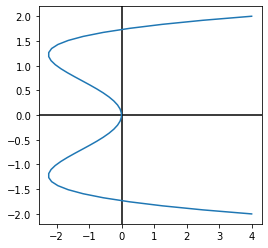

In [7]:
plt.figure(figsize=(4,4));
plt.plot(x,t)
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1);

Ova kriva ne prolazi vertikalni test, zbog toga sigurno nije grafik neke realne funkcije $y=f(x).$

Ograničavanjem opsega vrednosti parametra kojim je neka kriva definisana možemo da dobijemo pojedine njene delove. Ograničenje opsega vrednosti odvija se kroz suženje domena ili primenom transformacija. 

**Primer 3.** 
Skiciraćemo grafik vektorske funkcije $r(t)=\begin{bmatrix}\sin t&\sin^2t\end{bmatrix}^T,\quad t\in\mathbb{R}.$ Kako je $y=(\sin t)^2=x^2$ grafik predstavlja kvadratnu parabolu. Međutim, u pitanju je samo deo parabole s obzirom da je $\sin$ ograničena funkcija, tj.
$$-1\leq x=\sin t\leq1,\qquad 0\leq y=\sin^2t\leq1.$$
 Promena vrednosti parametra $t$ utiče na periodično kretanje napred-nazad duž ove krive.

In [8]:
x=np.linspace(-1,1)
y=x**2

def parabola(t):
    T=np.array([np.sin(t),np.sin(t)**2])
    plt.figure(figsize=(4,4))
    plt.plot(x,y,'-b')
    plt.plot(T[0],T[1],'or')
    plt.text(T[0],T[1]-0.5,'T')
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-0.5, 2);

In [9]:
interactive_plot = widgets.interact(parabola, t=(-10,10,0.1))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, min=-10.0), Output()), _dom_classes=('…

<function __main__.parabola(t)>

**Primer 4.** Veoma važna parametarska "kriva" je prava. Prava može biti zadata jednom tačkom $A\begin{bmatrix}a_1&a_2\end{bmatrix}^T$ i vektorom pravca $p=\begin{bmatrix}p_1&p_2\end{bmatrix}^T,$ ili preko dve različite tačke $A$ i $B\begin{bmatrix}b_1&b_2\end{bmatrix}^T,$
$$prava\ :\ A+t p=\begin{bmatrix}a_1+t\,p_1\\a_2+t\,p_2\end{bmatrix}\quad\mbox{ ili }\quad
prava\ :\ A+t(B-A)=(1-t)A+tB=\begin{bmatrix}(1-t)a_1+t\,b_1\\(1-t)a_2+t\,b_2\end{bmatrix},\ t\in\mathbb{R}.$$

Tačke sa duži $AB$ određenu su istom formulom samo smanjenog domena za parametar $t.$ Da li možete da odredite o kom opsegu parametra se radi? Iskoristite naredni kod za eksperiment na tu temu.

In [10]:
A=np.array([1,2])
B=np.array([-2,1])
tackeAB=np.stack((A,B))
parm=np.array([[-2,3],[4,-3]])
tackeCD=parm@tackeAB

In [11]:
def prava(t):
    T=(1-t)*A+t*B
    plt.figure(figsize=(4,4))
    plt.plot(tackeCD[:,0],tackeCD[:,1],'-b')
    plt.plot(A[0],A[1],'ok',B[0],B[1],'ok')
    plt.text(A[0],A[1]+0.5,'A')
    plt.text(B[0],B[1]+0.5,'B')
    plt.plot(T[0],T[1],'or')
    plt.text(T[0],T[1]-0.5,'T')
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.xlim(-6, 10)
    plt.ylim(-1, 5);

In [12]:
interactive_plot = widgets.interact(prava, t=(-3,2,0.1))
interactive_plot

interactive(children=(FloatSlider(value=-1.0, description='t', max=2.0, min=-3.0), Output()), _dom_classes=('w…

<function __main__.prava(t)>

Ista formula opisuje pravu i duž u $3D,$ i naravno kada još povećamo dimenziju vektorskog prostora,
$$prava\ :\ (1-t)A+t\,B,\ t\in\mathbb{R},\qquad duž\ AB\ :\ (1-t)A+t\,B,\ t\in[0,1].$$

Prikazaćemo pravu određenu tačkama $A\begin{bmatrix}2&1&2\end{bmatrix}^T$ i $B\begin{bmatrix}1&2&5\end{bmatrix}^T.$

In [13]:
tackeAB=np.array([[2,1],[1,2],[2,5]])
param=np.array([[4,-2],[-3,3]])
tackeCD=tackeAB@param

In [14]:
def prava3D(t):
    koef=np.array([1-t,t])
    T=tackeAB@koef
    slika = plt.figure(figsize=plt.figaspect(1))
    ax = slika.add_subplot(projection='3d')
    ax.plot(tackeCD[0],tackeCD[1],tackeCD[2],'-')
    ax.plot(tackeAB[0],tackeAB[1],tackeAB[2],'ok')
    ax.plot(T[0],T[1],T[2],'or')
    ax.text(2,1,2.3,"A")
    ax.text(1.1,2,5.1,"B")
    ax.text(T[0]-0.2,T[1]-0.2,T[2]-0.2,"T")   
    ax.set_xlabel("x-osa")
    ax.set_ylabel("y-osa")
    ax.set_zlabel("z-osa");

In [15]:
interactive_plot = widgets.interact(prava3D, t=(-3,2,0.1))
interactive_plot

interactive(children=(FloatSlider(value=-1.0, description='t', max=2.0, min=-3.0), Output()), _dom_classes=('w…

<function __main__.prava3D(t)>

Računar je veoma korisno sredstvo za razumevanje prostiranja krivih čije su koordinatne funkcije nelinearni izrazi. To je naročito bitno za sagledavanje krivih u 3D s obzirom da rotacijom grafika možemo da steknem bolji uvid.

**Primer 5.** Skiciraćemo grafik vektorske funkcije $r(t)=\begin{bmatrix}t&t^2&t^3\end{bmatrix}^T,\qquad -2\leq t\leq2.$

In [16]:
%matplotlib notebook

<IPython.core.display.Javascript object>


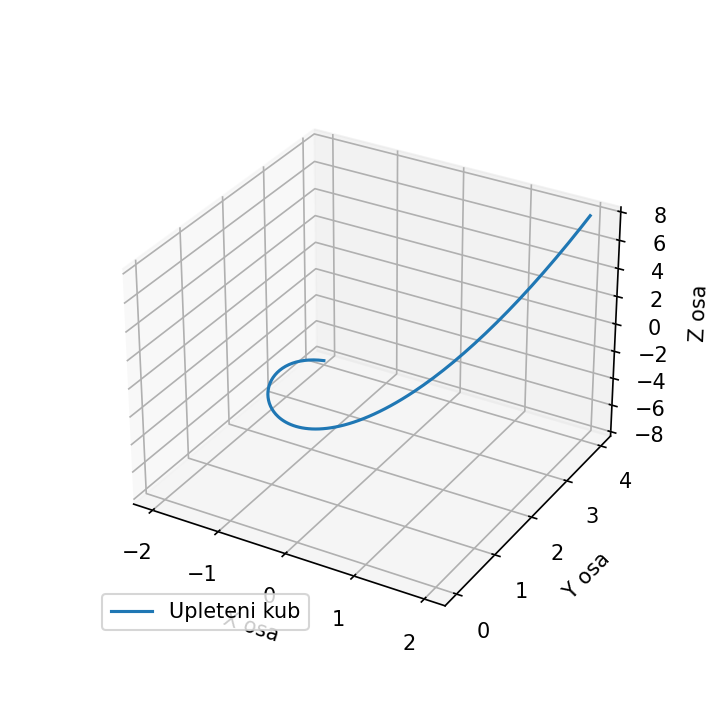

In [17]:
kub = plt.figure(figsize=plt.figaspect(1))
ax = kub.add_subplot(projection='3d')
t = np.linspace(-2, 2, 200)
x = t
y = t**2
z = t**3
ax.plot(x, y, z, label='Upleteni kub')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.legend(loc='lower left');

In [18]:
%matplotlib inline

**Primer 6.** [Kvadratna forma](https://en.wikipedia.org/wiki/Quadratic_form) po dve promenljive $x$ i $y$ je svaki izraz oblika
$$p(x,y)=ax^2+2bxy+cy^2,$$
tj. [homogen polinom](https://en.wikipedia.org/wiki/Homogeneous_polynomial) stepena 2. Kvadratna forma $p(x,y)$ ima svoj matrični zapis 
$$p(x,y)=v^TAv,$$
gde je $v=\begin{bmatrix} x\\y\end{bmatrix}$ vektor promenljivih, a matrica $A=\begin{bmatrix} a&b\\b&c\end{bmatrix}$ je simetrična i naziva se matrica kvadratne forme $p.$ Izbor matričnog zapisa zapravo nije jedinstveno određen i može se koristiti i matrica $A$ koja nije simetrična. Recimo, kvadratna forma $p(x,y)=2x^2+2xy-y^2$ je iskazana matričnim izrazima $v^TAv$ za sledeće  $A:$
$$A=\begin{bmatrix}2&1\\1&-1\end{bmatrix},\quad 	A=\begin{bmatrix}2&0\\2&-1\end{bmatrix},\quad
	A=\begin{bmatrix}2&3\\-1&-1\end{bmatrix}, 	\dots$$	

Kada matrica kvadratne forme $A$ nije simetrična, izborom $A_S=\dfrac{A+A^T}2$ dobijamo simetričnu matricu iste kvadratne forme. Recimo, kvadratna forma $q(x,y)=-3x^2+4xy+y^2$ može da se predstavi izrazom $v^TAv$ za 
$$A=\begin{bmatrix}-3&0\\4&1\end{bmatrix},\quad
A=\begin{bmatrix}-3&3\\1&1\end{bmatrix},\quad A=\begin{bmatrix}-3&5.3\\-1.3&1\end{bmatrix},\dots$$
Za sve navedene matrice važi 
$$A_S=\begin{bmatrix}-3&2\\2&1\end{bmatrix}\quad\mbox{ i }\quad q(x,y)=v^TA_Sv.$$

U nastavku pod matricom kvadratne forme podrazumevaćemo simetričnu matricu. Razlog ovakvog izbora leži u problemu ispitivanju ponašanju znaka vrednosti funkcije kvadratne forme. Zanima nas da li je kvadratna forma uvek pozitivna $q(x,y)>0,\ \forall (x,y)\neq(0,0),$ ili je uvek negativna, ili menja znak sa promenom vrednosti argumenata $x$ i $y.$ Na osnovu poznate teorije o simetričnim matricama, vidimo da se ovo pitanje svodi na ispitivanje pozitivne definitnosti odgovarajuće simetrične matrice $A_S$ kvadratne forme.

Za simetrične matrice 
$$A=\begin{bmatrix} 2&0\\0&3\end{bmatrix},\qquad B=\begin{bmatrix}1&-2\\-2&1/2\end{bmatrix},$$
izračunaćemo odgovarajuće kvadratne forme.
\begin{align}
    p_1(x,y)&=v^TAv=\begin{bmatrix} x&y\end{bmatrix}\begin{bmatrix} 2&0\\0&3\end{bmatrix}
    \begin{bmatrix} x\\y\end{bmatrix}=2x^2+3y^2,\\
    p_2(x,y)&=v^TBv=\begin{bmatrix} x&y\end{bmatrix}\begin{bmatrix} 1&-2\\-2&1/2\end{bmatrix}
    \begin{bmatrix} x\\y\end{bmatrix}=x^2-4xy+\frac12y^2.
\end{align}
Za kvadratnu formu $p_1(x,y)$ kažemo da je u dijagonalnom ili kanonskom obliku jer je zadata dijagonalnom matricom $A.$ Primećujemo da $p_1(x,y)$ ne sadrži član $xy.$ Na osnovu specijalnog dijagonalnog oblika, za kvadratnu formu $p_1(x,y)=2x^2+3y^2$ lako utvrđujemo osobinu da je uvek nenengativna, tj. važi da je
$$p_1(x,y)=0\Longleftrightarrow x=y=0,\quad \mbox{ inače }\ p_1(x,y)>0.$$

Kvadratna forma $p_2(x,y)=x^2-4xy+\frac12y^2$ ne poseduje ovu osobinu. Npr.
$p_2(1,1)=-2.5<0.$ Matrica kojom je zadata $p_2$ nije dijagonalna i to za posledicu ima postojanje sabirka sa mešovitim proizvodom promenljivih $xy.$ Ovaj sabirak pomalo otežava ispitivanje znaka kvadratne forme $p_2.$ Ipak, dovođenjem $p_2$ na oblik sa potpunim kvadratima  lakše sagledavamo ponašanje u znaku:
$$p_2(x,y)=x^2-4xy+\frac12y^2=(x-2y)^2-4y^2+\frac12y^2
=(x-2y)^2-\frac72y^2.$$
Drugim rečima, linearnom smenom promenljivih 
$$x'=x-2y,\quad y'=y$$
kvadratna forma $p_2$ postaje dijagonalna
$$p_2'(x',y')=x'^2-\frac72y'^2=\begin{bmatrix} x'&y'\end{bmatrix}
\begin{bmatrix} 1&0\\0&-7/2\end{bmatrix}\begin{bmatrix} x'\\y'\end{bmatrix}.$$

Ortogonalna dijagonalizacija matrice kvadratne forme $A=QDQ^T$ obavlja dva postupka gore opisana:
1. utvrđuje ponašanje znaka funkcije kvadratne forme njenom dijagonalizacijom, 
1. pronalazi linearnu smenu promenljivih kojom se kvadratna forma dovodi na kanonski oblik.

Analiziraćemo skupove tačaka u $2D$ opisane jednačinom $p(x,y)=c,$ gde je $c\in\mathbb{R}$ neka konstanta. Prvo razmatramo kanonski oblika, a zatim i prelazak iz opšteg na kanonski.

 Jednačina zadata kvadratnom formom
$$\dfrac{x^2}{a^2}+\dfrac{y^2}{b^2}=1\Longleftrightarrow
\begin{bmatrix} x&y\end{bmatrix}\begin{bmatrix} 1/a^2&0\\0&1/b^2\end{bmatrix}\begin{bmatrix} x\\y\end{bmatrix}
=1,\quad a,b\neq0,$$
predstavlja kanonsku jednačinu [elipse](https://sr.wikipedia.org/sr-ec/%D0%95%D0%BB%D0%B8%D0%BF%D1%81%D0%B0). Za njeno crtanje koristimo parametarski oblik ove krive 
$$\theta\mapsto\begin{bmatrix}a\cos\theta\\b\sin\theta\end{bmatrix},\quad \theta\in[0,2\pi].$$

In [19]:
teta=np.linspace(0,2*np.pi)
def elipsa(a,b):
    x=a*np.cos(teta)
    y=b*np.sin(teta)
    plt.figure(figsize=(4,4))
    plt.title("Elipsa")
    plt.plot(x,y,'-b')
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.xlim(-5.5, 5.5)
    plt.ylim(-5.5, 5.5);

In [20]:
interactive_plot = widgets.interact(elipsa, a=(0,5,0.1), b=(0,5,0.1))
interactive_plot

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0), FloatSlider(value=2.0, description='b'…

<function __main__.elipsa(a, b)>

Na osnovu kanonske jednačine elipse $\dfrac{x^2}{a^2}+\dfrac{y^2}{b^2}=1$ onda lako zaključujemo osobine jednačina opštijeg oblika
$\dfrac{x^2}{a^2}+\dfrac{y^2}{b^2}=c,\ c\in\mathbb{R}.$
Za $c>0$ i dalje će jednačinom biti generisana elipsa. Za $c=0$ imamo samo koordinatni početak - degenerisana elipsa. Za $c>0$ rezultat je prazan skup.

Implicitna jednačina sa kvadratnom formom čija matrica nije definitna, ali jeste regularna, ima kanonski oblik
$$
\dfrac{x^2}{a^2}-\dfrac{y^2}{b^2}=1\Longleftrightarrow
		\begin{bmatrix} x&y\end{bmatrix}\begin{bmatrix} \dfrac1{a^2}&0\\0&-\dfrac1{b^2}\end{bmatrix}
        \begin{bmatrix} x\\y\end{bmatrix}=1 \tag{1}
$$
i predstavlja kanonsku jednačinu [hiperbole](https://sr.wikipedia.org/sr-ec/%D0%A5%D0%B8%D0%BF%D0%B5%D1%80%D0%B1%D0%BE%D0%BB%D0%B0
) duž $x-$ose. Parametarska jednačina ove krive glasi
$$t\mapsto\begin{bmatrix}\pm a\cosh t\\b\sinh t\end{bmatrix},\quad t\in\mathbb{R}.$$

Jednačinom
$$\dfrac{x^2}{a^2}-\dfrac{y^2}{b^2}=-1\quad\Longleftrightarrow\quad -\dfrac{x^2}{a^2}+\dfrac{y^2}{b^2}=1, \tag{2}$$
zadata je hiperbola duž $y-$ose.

Degenerisana hiperbola, ima jednačinu 
$$\dfrac{x^2}{a^2}-\dfrac{y^2}{b^2}=0\quad\Longleftrightarrow\quad\left(\dfrac{x}{a}-\dfrac{y}{b}\right)\left(\dfrac{x}{a}+\dfrac{y}{b}\right)=0$$

i predstavlja uniju dve prave
 $\quad \dfrac{x}{a}-\dfrac{y}{b}=0\quad\mbox{ i }\quad
\dfrac{x}{a}+\dfrac{y}{b}=0.$  One su asimptote hiperbola $(1)$ i $(2).$

In [21]:
teta=np.linspace(-5,5)
t=np.array([-10,10])

def hiperbola(a,b):
    x1=a*np.cosh(teta)
    y1=b*np.sinh(teta)
    x2=a*np.sinh(teta)
    y2=b*np.cosh(teta)
    k=b/a
    plt.figure(figsize=(9,3))
    
    plt.subplot(1, 2, 1)
    plt.title("x-Hiperbola")
    plt.plot(x1,y1,'-b',-x1,y1,'-b')
    plt.plot(t,k*t,'-g',t,-k*t,'-g')
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.xlim(-10.5, 10.5)
    plt.ylim(-5.5, 5.5)
    
    plt.subplot(1, 2, 2)
    plt.title("y-Hiperbola")
    plt.plot(x2,y2,'-b',x2,-y2,'-b')
    plt.plot(t,k*t,'-g',t,-k*t,'-g')
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.xlim(-10.5, 10.5)
    plt.ylim(-10.5, 10.5);

In [22]:
interactive_plot = widgets.interact(hiperbola, a=(0.1,5,0.1), b=(0,5,0.1))
interactive_plot

interactive(children=(FloatSlider(value=2.5000000000000004, description='a', max=5.0, min=0.1), FloatSlider(va…

<function __main__.hiperbola(a, b)>

Razmisliti šta su skupovi tačaka za druge vrednosti $c\in\mathbb{R}?$ Probajte da analizirate sami kakav skup tačaka je dat jednačinom $p(x,y)=0$ gde matrica kvadratne forme nije regularna.

**Primer 7.** Skiciraćemo skup tačaka zadatog jednačinom
$$3x^2+4xy+3y^2=5\quad\Longleftrightarrow\quad
\begin{bmatrix} x&y\end{bmatrix}\begin{bmatrix}3&2\\2&3\end{bmatrix}
\begin{bmatrix} x\\y\end{bmatrix}=5
\quad\Longleftrightarrow\quad v^TAv=5
.$$
Da bismo to izveli neophodno je da datu kvadratnu formu prebacimo u kanonski oblik. Na taj način možemo da odredimo vrstu krive i neophodne parametre za njeno skiciranje. U te svrhe potrebna nam je ortogonalna dijagonalizacija matrice $A.$

In [23]:
A=np.array([[3,2],[2,3]])
D,Q=np.linalg.eigh(A)   #sopstvene vrednosti i sopstveni vektori simetričnih  matrica
print(np.round(D,3))
print(np.round(Q,3))

[1. 5.]
[[-0.707  0.707]
 [ 0.707  0.707]]


Na osnovu pozitivnih sopstvenih vrednosti vidimo da je jednačinom zadata elipsa. Dijagonalizacija matrice $A=QDQ^T$ prevodi kvadratnu formu $v^TAv=5$ u jednostavniji oblik smenom $u=Q^Tv.$ Tada je
$$v^TAv=v^TQDQ^Tv=u^TDu=5\quad\Longleftrightarrow\quad u^T\left(\dfrac15D\right)u=1.$$

In [24]:
D=D/5
D

array([0.2, 1. ])

Ukoliko uvedemo oznake $v=\begin{bmatrix}x\\y\end{bmatrix}$ i $u=\begin{bmatrix}x'\\y'\end{bmatrix},$ dijagonalizacija matrice $A$ daje kanonsku jednačinu elipse u koordinatnom sistemu $x',y',$ 
$$\dfrac{x'^2}{5}-y'^2=1\quad\Longleftrightarrow\quad x'=\sqrt5\cos\theta,\ y'=\sin\theta.$$
Da bismo je prikazali u $x,y$ koordinatnom sistemu potrebno je da vratimo smenu, $v=Qu.$

In [25]:
teta=np.linspace(0,2*np.pi)
D1=np.sqrt(D)
u=1/D1.reshape(2,1) * np.array([np.cos(teta),np.sin(teta)])
v=Q@u

In [26]:
ose=Q/D1
osa1 , osa2=ose[:,0] , ose[:,1]

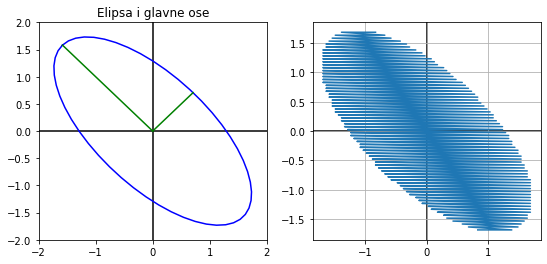

In [27]:
plt.figure(figsize=(9,4))

plt.subplot(1, 2, 1)
plt.title("Elipsa i glavne ose")
plt.plot(v[0],v[1],'-b')
plt.plot([0,osa1[0]],[0,osa1[1]],'-g')
plt.plot([0,osa2[0]],[0,osa2[1]],'-g')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.xlim(-2, 2)
plt.ylim(-2, 2);

plt.subplot(1, 2, 2)
n=200
t=np.linspace(-5,5,n)
Xt,Yt=np.meshgrid(t,t)
Xt=Xt.reshape(n*n,)
Yt=Yt.reshape(n*n,)
Zt=(3*(Xt**2)+4*Xt*Yt+3*(Yt**2)<=5)
plt.plot(Xt[Zt],Yt[Zt])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

**Primer 8.** Skiciraćemo skup tačaka zadatog jednačinom
$$x^2+4xy+y^2=4\quad\Longleftrightarrow\quad
\begin{bmatrix} x&y\end{bmatrix}\begin{bmatrix}1&2\\2&1\end{bmatrix}
\begin{bmatrix} x\\y\end{bmatrix}=4
\quad\Longleftrightarrow\quad v^TAv=4
.$$

In [28]:
A=np.array([[1,2],[2,1]])
D,Q=np.linalg.eigh(A)   
print(np.round(D,3))
print(np.round(Q,3))

[-1.  3.]
[[-0.707  0.707]
 [ 0.707  0.707]]


Zaključujemo da matrica nije definitna pa je jednačinom data hiperbola. Odredićemo kanonsku jednačinu i glavne ose. Ukoliko uvedemo oznake $v=\begin{bmatrix}x\\y\end{bmatrix}$ i $u=\begin{bmatrix}x'\\y'\end{bmatrix}=Q^Tv,$ dijagonalizacija matrice $A$ daje kanonsku jednačinu hiperbole u koordinatnom sistemu $x',y',$
$$-x'^2+3y'^2=4\quad\Longleftrightarrow\quad -\dfrac{x'^2}{4}+\dfrac{y'^2}{4/3}=1.$$

Za grafički prikaz koristićemo jednačinu hiperbole u polarnom obliku:
$$x'=\frac{2/\sqrt3}{\cos\theta},\quad y'=2\tan\theta,\quad \theta\in[0,2\pi].$$

In [29]:
D[[0,1]]=D[[1,0]]
Q[:,[0,1]]=Q[:,[1,0]]
D1=np.sqrt(np.abs(4/D))
ose=Q*D1
teta=np.linspace(0,2*np.pi)
x1=D1[0]/np.cos(teta)
y1=D1[1]*np.tan(teta)
u=np.stack((x1,y1))
v=Q@u
osa1 , osa2=ose[:,0] , ose[:,1]

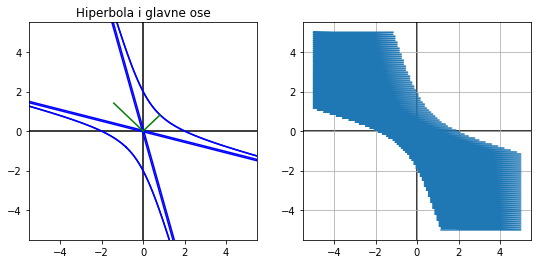

In [30]:
plt.figure(figsize=(9,4))

plt.subplot(1, 2, 1)
plt.title("Hiperbola i glavne ose")
plt.plot(v[0],v[1],'-b',-v[0],-v[1],'-b')
plt.plot([0,osa1[0]],[0,osa1[1]],'-g')
plt.plot([0,osa2[0]],[0,osa2[1]],'-g')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.xlim(-5.5, 5.5)
plt.ylim(-5.5, 5.5);

plt.subplot(1, 2, 2)
n=100
t=np.linspace(-5,5,n)
Xt,Yt=np.meshgrid(t,t)
Xt=Xt.reshape(n*n,)
Yt=Yt.reshape(n*n,)
Zt=(Xt**2+4*Xt*Yt+Yt**2<=4)
plt.plot(Xt[Zt],Yt[Zt])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

**Primer 9.** 	Kvadratna funkcija dve promenljive $$f(x,y)=3x^2-2xy+y^2+4x-3y-5$$
	posmatra se kao zbir kvadratne forme i linearne forme. Shodno tome se i matrični zapis prilagođava.
- Kvadratna forma $3x^2-2xy+y^2$ se predstavlja sa $\begin{bmatrix} x&y\end{bmatrix}
\begin{bmatrix}3&-1\\-1&1\end{bmatrix}\begin{bmatrix} x\\y\end{bmatrix}.$
- Linearna forma $4x-3y$ predstavlja  se skalarnim proizvodom $\begin{bmatrix} 4&-3\end{bmatrix}
\begin{bmatrix} x\\y\end{bmatrix}.$ 
- Linearna funkcija ili afina funkcija je $4x-3y+5.$

Tada je matrični zapis kvadratne funkcije dat sledećim izrazom:
$$f(x,y)=3x^2-2xy+y^2+4x-3y+5=	\begin{bmatrix} x&y\end{bmatrix}
\begin{bmatrix}3&-1\\-1&1\end{bmatrix}\begin{bmatrix} x\\y\end{bmatrix}+
\begin{bmatrix} 4&-3\end{bmatrix}\begin{bmatrix} x\\y\end{bmatrix}+5.$$

Posmatramo kvadratnu jednačinu 
$$f(x,y)=0\quad\Longleftrightarrow\quad 3x^2-2xy+y^2+4x-3y=5,$$ 
i potražićemo krivu koja je njom opisana. Kvadratna forma $v^TAv$ definiše tip krive i njenu rotaciju, linearni deo $b^Tv$ obavlja translaciju te krive.

In [31]:
A=np.array([[3,-1],[-1,1]])
b=np.array([4,-3])
c=5
D,Q=np.linalg.eigh(A)   
print(np.round(D,3))
print(np.round(Q,3))

[0.586 3.414]
[[-0.383 -0.924]
 [-0.924  0.383]]


S obzirom da je matrica $A$ pozitivno definitna zaključujemo da će kriva biti elipsa. 

Uvođenjem smene $u=Q^Tv$ kvadratna jednačina dobija oblik
$$v^TAv+b^Tv=v^TQD\underbrace{Q^Tv}_u+\underbrace{b^TQ}_{b_1}\underbrace{Q^Tv}_u=u^TDu+b_1^Tu=c.$$

In [32]:
b1=b@Q

Neka je $D^{1/2}$ dijagonalna matrica sa elementima na glavnoj dijagonali $\sqrt{\lambda_1}$ i $\sqrt{\lambda_2},$  korenima sopstvenih vrednosti matrice $A.$ Njenu inverznu matricu označićemo jednostavno $D^{-1/2}={\rm diag}\left(\dfrac1{\sqrt{\lambda_1}},\dfrac1{\sqrt{\lambda_2}}\right).$

\begin{align}
c&=u^TDu+b_1^Tu=u^TD^{1/2}D^{1/2}u+b_1^TD^{-1/2}D^{1/2}u
=u^TD^{1/2}D^{1/2}u+\dfrac{2}{2}b_1^TD^{-1/2}D^{1/2}u,\\
w&=D^{1/2}u,\quad b_2^T=\dfrac{1}{2}b_1^TD^{-1/2},\\
c&=w^Tw+2b_2^Tw=w^Tw+2b_2^Tw+b_2^Tb_2-b_2^Tb_2\quad
\Longrightarrow\quad w^Tw+2b_2^Tw+b_2^Tb_2=\underbrace{c+b_2^Tb_2}_k\\
k&=(w+b_2)^T(w+b_2).
\end{align}
Zaključujemo da je u koordinatnom sistemu određenim vektorom $s=w+b_2$ tražena figura centralna kružnica poluprečnika $\sqrt{k}.$ Njena parametarska jednačina glasi
$$\theta\mapsto\begin{bmatrix}\sqrt{k}\cos\theta\\\sqrt{k}\sin\theta\end{bmatrix}.$$ Da bismo je preveli u krivu koordinatnom sistemu vektora $v$ primenjujemo inverzne smene.

$$v\quad \mapsto\quad u=Q^Tv\quad \mapsto\quad w=D^{1/2}u \quad \mapsto\quad s=w+b_2$$
$$s\quad \mapsto\quad w=s-b_2\quad \mapsto\quad u=D^{-1/2}w \quad \mapsto\quad v=Qu.$$

In [33]:
D1=np.sqrt(D)
b2=b1/(2*D1)
k=np.dot(b2,b2)+c
teta=np.linspace(0,2*np.pi)
s=np.sqrt(k)*np.array([np.cos(teta),np.sin(teta)])
w=s.T-b2
u=(w/D1).T
v=Q@u

In [34]:
np.eye(3,2,-1)

array([[0., 0.],
       [1., 0.],
       [0., 1.]])

In [35]:
ose=np.sqrt(k)*np.eye(3,2,-1)-b2
ose=Q@(ose/D1).T
centar, osa1 , osa2=ose[:,0] , ose[:,1] , ose[:,2]

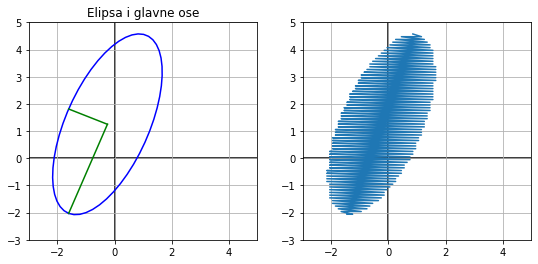

In [36]:
plt.figure(figsize=(9,4))

plt.subplot(1, 2, 1)
plt.title("Elipsa i glavne ose")
plt.plot(v[0],v[1],'-b')
plt.plot([centar[0],osa1[0]],[centar[1],osa1[1]],'-g')
plt.plot([centar[0],osa2[0]],[centar[1],osa2[1]],'-g')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.xlim(-3, 5)
plt.ylim(-3, 5)
plt.grid();

plt.subplot(1, 2, 2)
n=200
t=np.linspace(-10,10,n)
Xt,Yt=np.meshgrid(t,t)
Xt=Xt.reshape(n*n,)
Yt=Yt.reshape(n*n,)
Zt=(3*(Xt**2)-2*Xt*Yt+Yt**2+4*Xt-3*Yt<=5)
plt.plot(Xt[Zt],Yt[Zt])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.xlim(-3, 5)
plt.ylim(-3, 5)
plt.grid();

**Primer 10.** Predstavićemo kvadaratnu jednačinu $3x^2+3y^2-6xy+4y-8=0$ u matričnom obliku.
$$3x^2+3y^2-6xy+4y-8=0\quad\Longleftrightarrow\quad \begin{bmatrix} x&y\end{bmatrix}\begin{bmatrix}3&-3\\-3&3\end{bmatrix}\begin{bmatrix} x\\y\end{bmatrix}+
\begin{bmatrix}0&4\end{bmatrix}\begin{bmatrix} x\\y\end{bmatrix}-8=0.$$
Potražimo sopstvene vrednosti i sopstvene vektore matrice kvadratne forme $A=\begin{bmatrix}3&-3\\-3&3\end{bmatrix}.$

In [37]:
A=np.array([[3,-3.],[-3.,3]])
b=np.array([0,4])
c=-8
D,Q=np.linalg.eigh(A)   #sopstvene vrednosti i sopstveni vektori simetričnih  matrica
print(np.round(D,3))
print(np.round(Q,3))

[0. 6.]
[[-0.707 -0.707]
 [-0.707  0.707]]


In [38]:
D[[0,1]]=D[[1,0]]
print(np.round(D,3))
Q[:,[0,1]]=Q[:,[1,0]]
print(np.round(Q,3))

[6. 0.]
[[-0.707 -0.707]
 [ 0.707 -0.707]]


Matrica $A$ je pozitivno semidefinitna, zaključujemo da kvadratna funkcija predstavlja jednačinu parabole.

Ukoliko uvedemo oznake $v=\begin{bmatrix}x\\y\end{bmatrix}$ i $u=\begin{bmatrix}x'\\y'\end{bmatrix}=Q^Tv,$ dobićemo jednačinu parabole u koordinatnom sistemu $x',y'.$ $\begin{bmatrix}x\\y\end{bmatrix}=Q\begin{bmatrix}x'\\y'\end{bmatrix}.$
$$v^TAv+b^Tv=c\quad\Longleftrightarrow\quad u^TDu+\underbrace{b^TQ}_{b_1}u=c \quad\Longleftrightarrow\quad 
u^TDu+b_1^Tu=c.$$

In [39]:
b1=b@Q
print(np.round(b1,5))

[ 2.82843 -2.82843]


\begin{align}&v^TAv+b^Tv-8=0\quad\Longleftrightarrow\quad
6x'^2+2.828x'-2.828y'-8=0\quad\Longleftrightarrow\quad x'^2+\dfrac{2.828}6x'-\dfrac{2.828}6y'-\dfrac86=0\\
&\Longleftrightarrow\quad x'^2+0.47x'-0.47y'-1.33=0
\end{align}

In [40]:
b2=b1/D[0]
b2

array([ 0.47140452, -0.47140452])

In [41]:
c1=c/D[0]
c1

-1.3333333333333333

In [42]:
D1=D/D[0]

\begin{align}
v^TAv+b^Tv-8=0\quad&\Longleftrightarrow\quad \left(x'+\frac{0.47}{2}\right)^2-\left(\frac{0.47}{2}\right)^2-0.47y'-1.33=0\quad\Longleftrightarrow\quad
\left(x'+0.24\right)^2-1.389-0.47y'=0\\
&\Longleftrightarrow\quad
 \left(x'+l\right)^2-0.47y'+k=0
\end{align}

In [43]:
k=c1-(b2[0]/2)**2
print(np.round(k,3))
l=b2[0]/2
l

-1.389


0.2357022603955158

\begin{align}v^TAv+b^Tv-8=0\quad&\Longleftrightarrow\quad
 \left(x'+l\right)^2-0.47\left(y'+\dfrac{k}{-0.47}\right)=0
 \quad\Longleftrightarrow\quad
 \left(x'+l\right)^2+b_2[1](y'+k_1)=0
\end{align}

In [44]:
k1=k/b2[1]
k1

2.946278254943948

Translacijom koordinatnog sistema $x',y'$ u sistem $x'',y''$
$$\begin{bmatrix}x''\\y''\end{bmatrix}=\begin{bmatrix}x'+l\\y'+k_1\end{bmatrix}$$ dolazimo do kanonske jednačine ove parabole.
$$y''=\dfrac{-1}{b_2[1]}x''^2=ax''^2.$$

In [45]:
a=-1/b2[1]
print(np.round(a,3))

2.121


In [46]:
x2=np.linspace(-4,4)
y2=a*x2**2
x1=x2-l
y1=y2-k1
koord=Q@np.array([x1,y1])

kopoc=Q@np.array([-l,-k1])   #slika koordinatnog početka x",y" nakon vraćanja smena u x,y
osax=Q@np.array([1-l,-k1])   #slika vektora (1,0) u x",y" nakon vraćanja smena u x,y
osay=Q@np.array([-l,1-k1])   #slika vektora (0,1) u x",y" nakon vraćanja smena u x,y

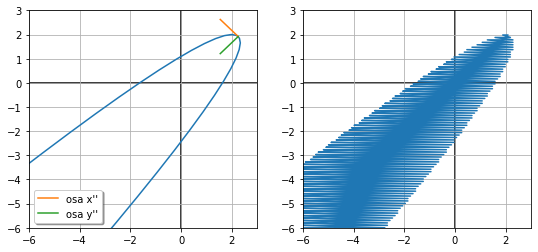

In [47]:
plt.figure(figsize=(9,4))

plt.subplot(1, 2, 1)
plt.plot(koord[0],koord[1])
#glavne ose
plt.plot([kopoc[0],osax[0]],[kopoc[1],osax[1]],label="osa x''")
plt.plot([kopoc[0],osay[0]],[kopoc[1],osay[1]],label="osa y''")
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.xlim(-6,3)
plt.ylim(-6,3)
plt.legend(loc='lower left', shadow=True)
plt.grid()


plt.subplot(1, 2, 2)
n=100
t=np.linspace(-6,4,n)
Xt,Yt=np.meshgrid(t,t)
Xt=Xt.reshape(n*n,)
Yt=Yt.reshape(n*n,)
Zt=(3*Xt**2-6*Xt*Yt+3*Yt**2+4*Yt<=8)
plt.plot(Xt[Zt],Yt[Zt])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.xlim(-6,3)
plt.ylim(-6,3)
plt.grid();

## Površi

Pojam površi upoznali smo sa grafikom funkcije $z=f(x,y).$ Međutim, pojam površi ide šire od toga. Površ je skup tačaka u $\mathbb{R}^n,\ n\geq3,$ čiji su vektori položaja opisani kroz koordinatne funkcije dve nezavisne promenljive. Jasniju sliku površi dobićemo kroz geometriju u $3D.$

Ukoliko zamislimo krivu u 3D koja se kreće kroz ovaj prostor i pratimo trag koji ta kriva ostavlja dobijamo sliku površi u 3D.

<div>
   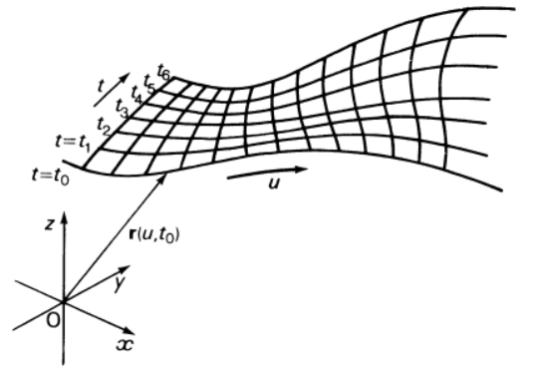  
</div>

Površ u 3D predstavljamo vektorom položaja $r$ čije koordinate se menjaju u zavisnosti od dva parametra, $r=r(u,t)=\begin{bmatrix}u&t&f(u,t)\end{bmatrix}^T.$ Skup vrednosti koje mogu uzeti parametri $u$ i $t$ predstavlja domen funkcije $r,$ tj. domen  površi u 3D koja je njom generisana. Jedan od standardnih načina za grafički prikaz je korišćenje Dekartovih koordinata $x,y,z,$ tj.  $r=r(x,y)=\begin{bmatrix}x&y&f(x,y)\end{bmatrix}^T.$ Umesto pisanja tri koordinate vektora $r$ možemo da koristimo i skraćenu notaciju $z=f(x,y)$ za grafik i samu funkciju koja ga generiše. Za domen $D$ funkcije $f(x,y)$ biraćemo neke jednostavne figure u ravni. Oblike zadavanja površi upoznaćemo kroz primere u nastavku.

**Primer 11.** Prikazaćemo primenu [sfernih koordinata](https://en.wikipedia.org/wiki/Spherical_coordinate_system) za generisanje grafičkog prikaza jedinične sfere u odnosu na $L_2$ normu. 
<div>
   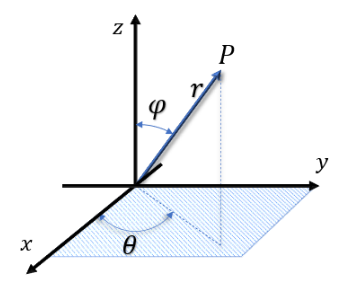  
</div>
 
Tri kooridnate tačke $P\in\mathbb{R}^3,\ (r, \varphi, \theta)$ definisane su sa:

- $r\geq0$ je rastojanje od koordinatnog početka do $P,$ tj. dužina vektora položaja tačke $P.$
- $0\leq\varphi\leq\pi=180^o$ je ugao koji zaklapa pozitivni deo $z-$ ose sa vektorom položaja tačke $P.$
- $0\leq\theta\leq2\pi=360^o$ je ugao koji zaklapa pozitivni deo $x-$ ose sa projekcijom vektora položaja tačke $P$ na $Oxy$ ravan.

Ugao $\varphi$ obično se zove zenit, a $\theta$ azimut.

Parametarska jednačina centralne sfere poluprečnika $r$ glasi:
$$\left\{\begin{array}{l}
x=x(\varphi,\theta)=r\cos(\theta)\sin(\varphi),\\
y=y(\varphi,\theta)=r\sin(\theta)\sin(\varphi),\\
z=z(\varphi,\theta)=r\cos(\varphi),
\end{array}\right.\qquad \varphi\in[0,\pi],\quad \theta\in[0,2\pi].$$

Ove jednakosti zapravo predstavljaju transformaciju sfernih koordinata u Dekartove.

S obzirom da je za površinu sfere $r$ konstanta, za kreiranje diskretizacije domena površi sfere koristimo samo vrednosti zenita i azimuta:
$$0\leq\varphi_1\leq\varphi_2\leq\dots\leq\varphi_m\leq\pi,\qquad
0\leq\theta_1\leq\theta_2\leq\dots\leq\theta_n\leq2\pi.$$
<div>
   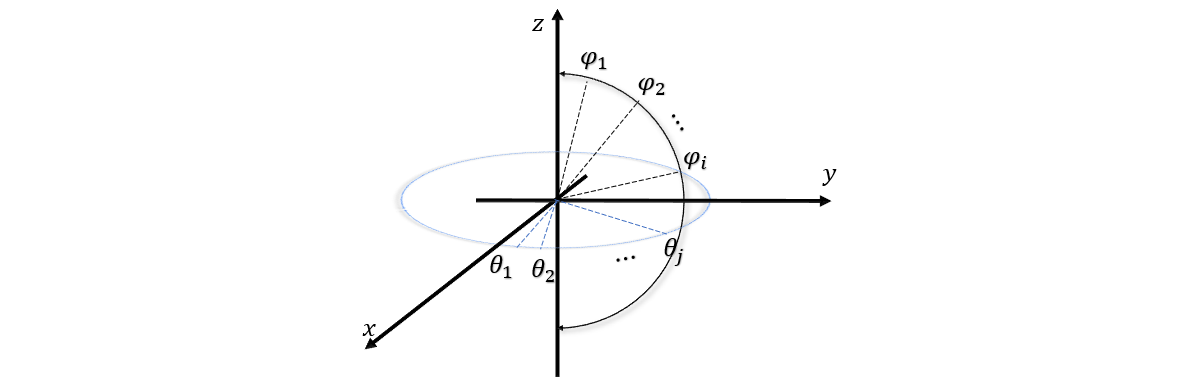  
</div>

Tada su tačke kojima se opisuje površ sfere:
$$\left\{\begin{array}{l}
x_{ij}=x(\varphi_i,\theta_j)=r\cos(\varphi_i)\sin(\theta_j),\\
y_{ij}=y(\varphi_i,\theta_j)=r\sin(\varphi_i)\sin(\theta_j),\\
z_{ij}=z(\varphi_i,\theta_j)=r\cos(\theta_j),
\end{array}\right.\qquad i=1,2,\dots m,\quad j=1,2,\dots,n,$$

<IPython.core.display.Javascript object>


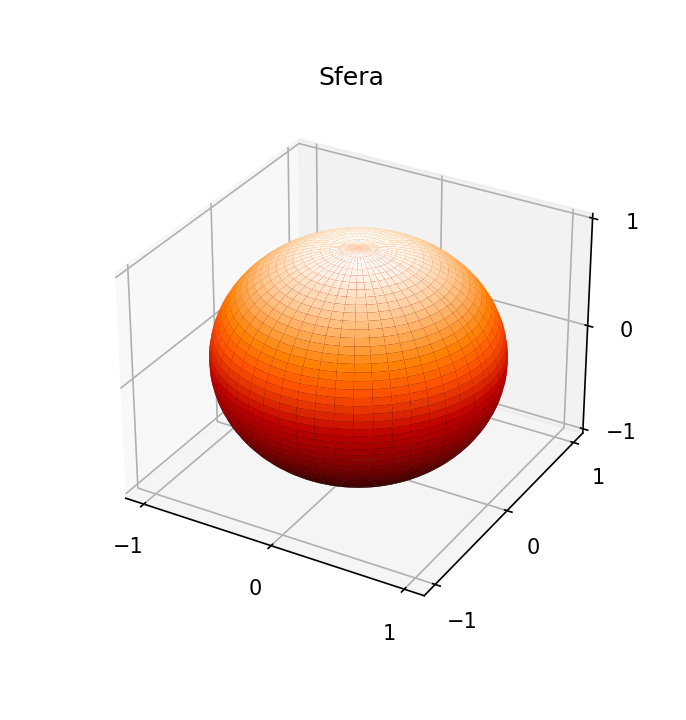

In [48]:
%matplotlib notebook

sfera =  plt.figure(figsize=plt.figaspect(1.05))
ax = sfera.add_subplot(projection='3d')
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
x =  np.outer(np.cos(theta), np.sin(phi))
y =  np.outer(np.sin(theta), np.sin(phi))
z =  np.outer(np.ones(100), np.cos(phi))
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])


ax.plot_surface(x, y, z , cmap=cm.gist_heat)
plt.title("Sfera");

## Krive nivoa i konturni grafik

Osim prethodnih prikaza funkcija u $3D$ veoma koristan način sagledavanja ponašanja vrednosti funkcije od dve promenljive  uvezen je iz kartografije: povezivanje linijom tačaka iste visine. Krive sa  svojstvom $f(x,y)=c$ zovemo krive nivoa ili konturne linije, a odgovarajući grafik je konturni grafik. Konturni grafik je 2D grafički prikaz površi kroz konturne linije. 

<div>
   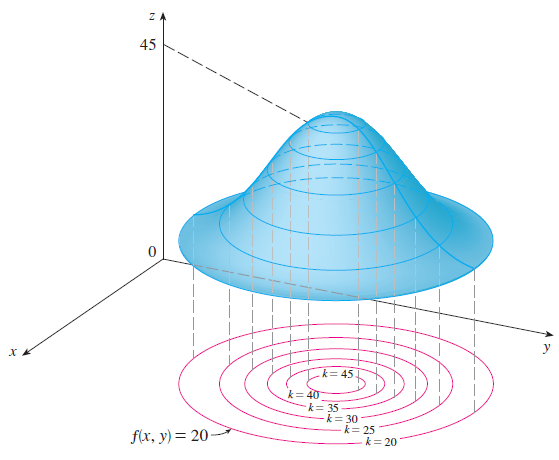  
</div>

Konturne linije $f(x,y)=c$ nastaju presekom površi funkcije $z=f(x,y)$ sa ravni $y=c.$ Zatim se dobijene krive projektuju na $Oxy$ ravan. To čini konturni grafik funkcije. 

**Zadatak 1.** Dat je grafik kontura funkcije $f.$ Na osnovu njega odrediti približne vrednosti $f(1,3)$ i $f(4,5).$
<div>
   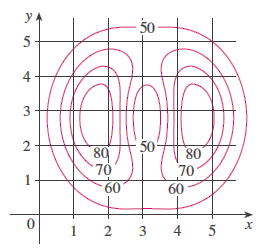  
</div>

**Rešenje :**

Na grafiku obeležimo tačke domena, kao što je urađeno na narednoj slici, i tražimo najbližu konturnu liniju odgovarajućoj tački.
<div>
   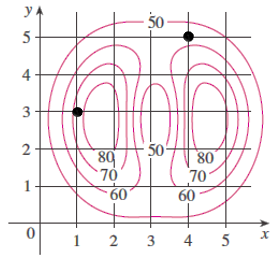  
</div>

Kako je $(1,3)$ bliža konturnoj liniji nivoa 70 nego liniji nivoa 80, možemo da procenimo npr. $f(1,3)\approx73.$ Slično,
tačka $(4,5)$ je nešto bliža 60 nego 50, pa procenjujemo npr. $f(4,5)\approx56.$

Brzina promena vrednosti funkcije može da se prati npr. po nekom pravcu. Na narednoj slici postavljene su usmerene duži dužine 1 u različitim smerovima kako bismo pratili brzinu promene u vrednostima funkcije po naznačenom pravcu.
<div>
   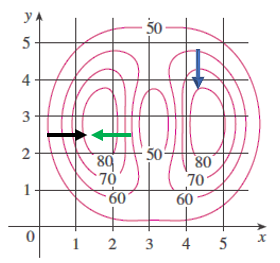  
</div>

Prateći strelicu crne boje vidimo da je za promenu veličine $1$ po $x,$ vrednost funkcije skočila od 50 na 80. Brzina promene duž crne strelive onda je $30/1.$ 

Prema zelenoj strelici skok vrednosti sa 60 na 80 dogodio se prilikom promene od $1/2$ vrednosti duž $x.$ Brzina ove promene je $20/(1/2)=40.$ Itd.

Zaključujemo da gušći raspored konturnih linija u nekoj oblasti ukazuje na brže promene vrednosti funkcije u okolini.

Za predstavljanje konturnog grafika neke površi Matplotlib poseduje ugrađenu [funkciju](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) `contur`.

**Primer 12.** Posmatramo funkciju $f(x,y)=(x^2+3y^2)e^{-x^2-y^2}.$ Prikazaćemo najpre grafik ove funkcije u 3D sa presecima ravni za odgovarajuće konturne linije $f(x,y)=c,$ $c\in\{0.2,0.5\}.$

In [49]:
x=np.linspace(-5,5)
y=np.linspace(-3,3)

X,Y=np.meshgrid(x,y)

Z0=np.ones((50,50))

Koristeći ovu mrežu prikazaćemo površ koju generiše funkcija
$$f(x,y)=(x^2+3y^2)e^{-x^2-y^2},\qquad -5\leq x\leq5,\quad -3\leq y\leq 3.$$

<IPython.core.display.Javascript object>


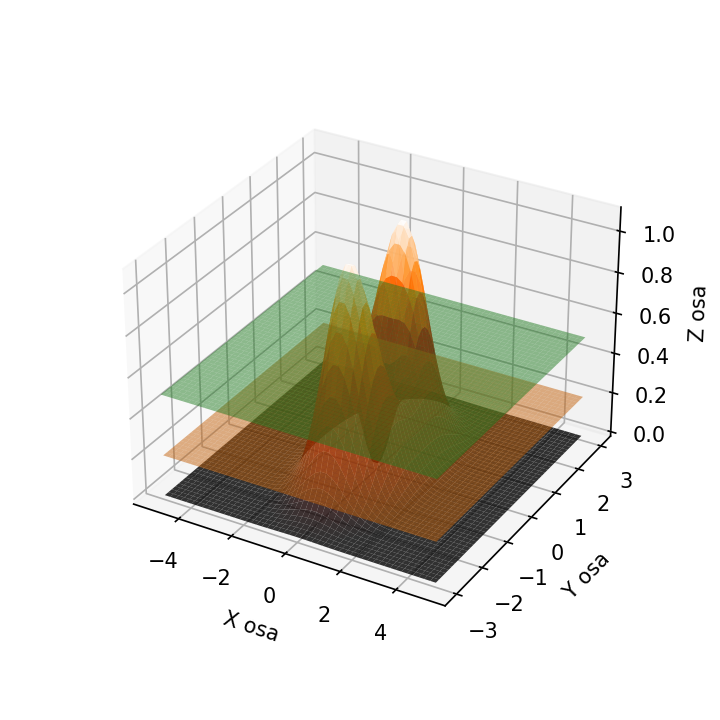

In [50]:
pomx=X**2
pomy=Y**2
Z=(pomx+3*pomy)*np.exp(-pomx-pomy)

povrs = plt.figure(figsize=plt.figaspect(1))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z, cmap=cm.gist_heat,alpha=0.8);
ax.plot_surface(X,Y,0.2*Z0,alpha=0.5)
ax.plot_surface(X,Y,0.5*Z0,alpha=0.5);

A sada predstavljamo i odgovarajuće konture.

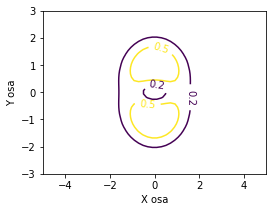

In [51]:
%matplotlib inline
plt.figure(figsize=(4,3))
kontura=plt.contour(X,Y,Z,[0.2,0.5])
plt.clabel(kontura,inline=True, fontsize=10)#dodavanje oznaka nivoa konturnih linija
plt.xlabel('X osa')
plt.ylabel('Y osa');

Naravno, možemo i da prepustimo kompajleru da sam odredi kog nivoa će konturne linije biti prikazane.

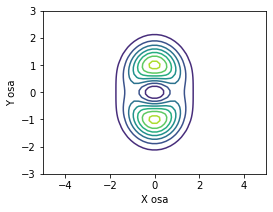

In [52]:
plt.figure(figsize=(4,3))
plt.contour(X,Y,Z)
plt.xlabel('X osa')
plt.ylabel('Y osa');

**Primer 13.** Pre crtanja grafika funkcije $f(x,y)=-x^2-y^2$ analiziraćemo njen komponente kroz konturne linije $f(x,y)=c.$ Jasno je da za $c>0$ ne postoje koordinate $x,y\in\mathbb{R}$ za koje bi bila ispunjena jednakost 
$-x^2-y^2>0.$ Zaključujemo da će se grafik funkcije naći ceo ispod $Oxy$ ravni. Za $c=0$ je koordinatni početak jedina konturna linija. Za $c<0$ jednačina $-x^2-y^2=c$ se lako transformiše u oblik $x^2+y^2=r^2,$ što je jednačina kružnice. Sledi da se grafik ove funkcije dobija translacijom i širenjem kružnica duž negativnog dela $z-$ose.

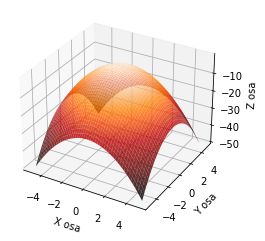

In [53]:
x=np.linspace(-5,5)
y=np.linspace(-5,5)

X,Y=np.meshgrid(x,y)
Z=-X**2-Y**2

povrs = plt.figure(figsize=plt.figaspect(1))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z, cmap=cm.gist_heat,alpha=0.8);

Kružnice se ne primećuju na $3D$ , ali su jasno obeležene na konturnom grafiku. Sa njega jasno vidimo da sa porastom negativnosti $z-$koordinate kružnice budu sve šire.

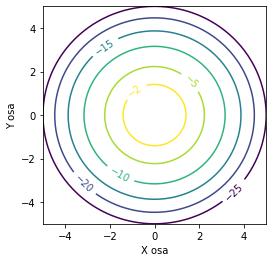

In [54]:
plt.figure(figsize=(4,4))
kontura=plt.contour(X,Y,Z,[-25,-20,-15,-10,-5,-2])
plt.clabel(kontura,inline=True, fontsize=10)
plt.xlabel('X osa')
plt.ylabel('Y osa');

**Zadatak 2.**  Povezati jednačine sa odgovarajućim graficima i konturnim prikazima.
\begin{align}
&a)&&z=\sin(xy),\qquad &&b) &&z=e^x\cos y,\qquad &&v)&&  z=\sin(x-y),\\
&g)&&z=\sin x-\sin y, &&d) && z=(1-x^2)(1-y^2), && đ) && z=\dfrac{x-y}{1+x^2+y^2}
\end{align}

<div>
   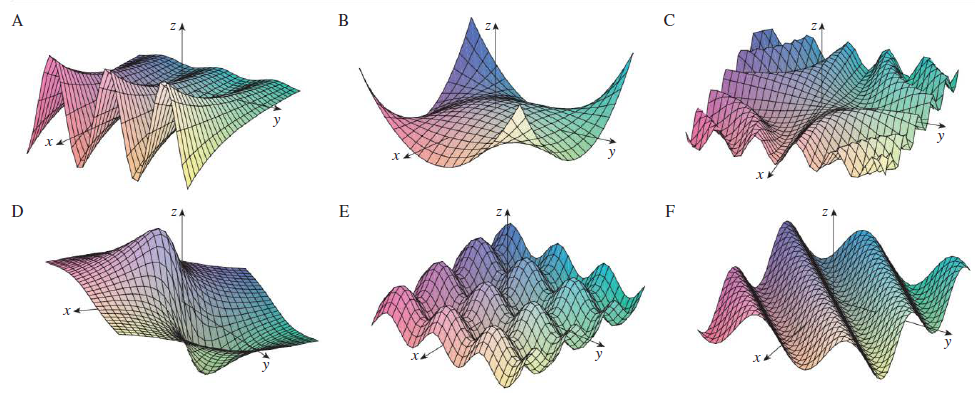  
</div>

<div>
   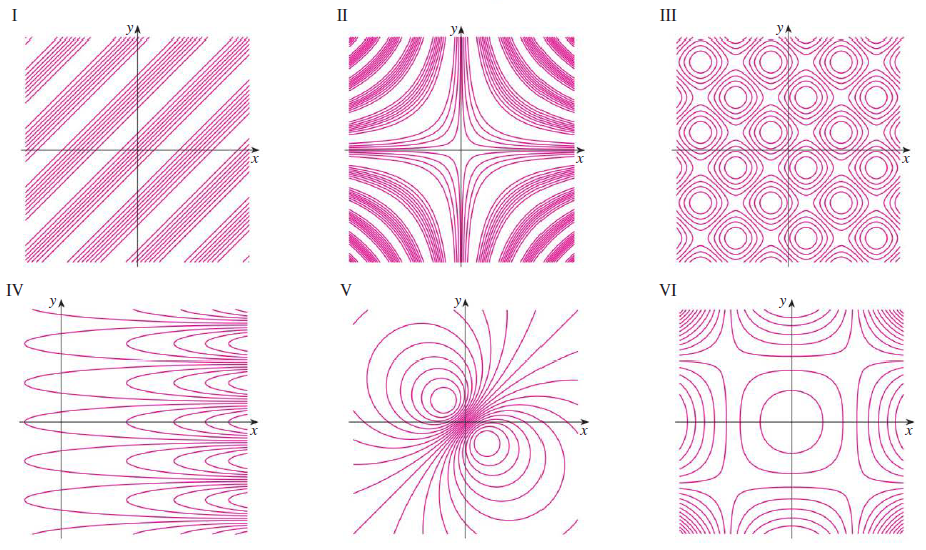  
</div>

**Rešenje :**

Rešenja u nastavku mogu da se provere primenom odgovarajućih naredbi. 

In [55]:
x=np.linspace(-np.pi,np.pi,100)
y=np.linspace(-np.pi,np.pi,100)

X,Y=np.meshgrid(x,y)

a) Funkcija $z=\sin(xy)$ ima karakteristike da duž $x$ i $y$ ose uzima vrednost $0.$ Jedini grafik od ponuđenih sa tom karakteristikom je C, i odgovara mu kontura II.

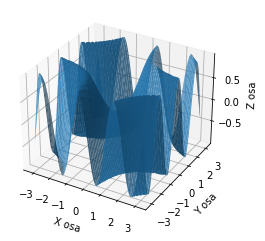

In [56]:
Z=np.sin(X*Y)

povrs = plt.figure(figsize=plt.figaspect(0.7))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,alpha=0.8);

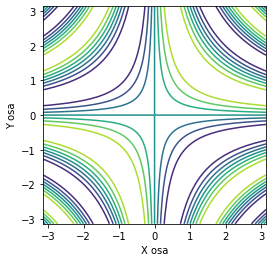

In [57]:
plt.figure(figsize=(4,4))
plt.contour(X,Y,Z)
plt.xlabel('X osa')
plt.ylabel('Y osa');

b) Funkcija $z=e^x\cos y$ prikazana je grafikom A i konturom IV. Razlog leži u karakteristikama: grafik je periodičan duž $y-$ose, a amplitude eksponencijalno rastu paralelno $x-$osi.

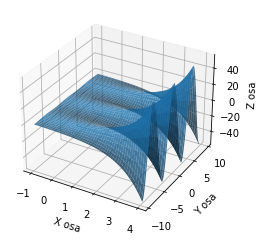

In [58]:
x=np.linspace(-1,4,100)
y=np.linspace(-3*np.pi,3*np.pi,100)
X,Y=np.meshgrid(x,y)
Z=np.exp(X)*np.cos(Y)

povrs = plt.figure(figsize=plt.figaspect(1))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,alpha=0.8);

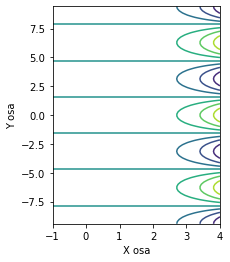

In [59]:
plt.figure(figsize=(3,4))
plt.contour(X,Y,Z)
plt.xlabel('X osa')
plt.ylabel('Y osa');

v) $z=\sin(x-y),$ F, I, zbog karakteristika duž prave $y=x.$

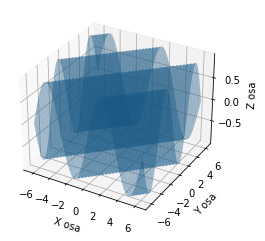

In [60]:
x=np.linspace(-2*np.pi,2*np.pi,100)
y=np.linspace(-2*np.pi,2*np.pi,100)
X,Y=np.meshgrid(x,y)
Z=np.sin(X-Y)

povrs = plt.figure(figsize=plt.figaspect(0.4))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,alpha=0.4);

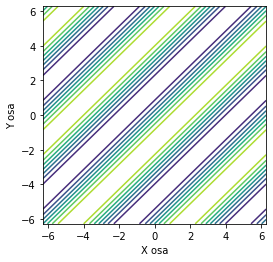

In [61]:
plt.figure(figsize=(4,4))
plt.contour(X,Y,Z)
plt.xlabel('X osa')
plt.ylabel('Y osa');

g) $z=\sin x-\sin y,$  E, III

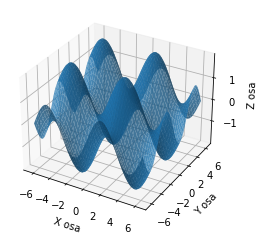

In [62]:
x=np.linspace(-2*np.pi,2*np.pi,100)
y=np.linspace(-2*np.pi,2*np.pi,100)
X,Y=np.meshgrid(x,y)
Z=np.sin(X)-np.sin(Y)

povrs = plt.figure(figsize=plt.figaspect(0.5))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,alpha=0.8);

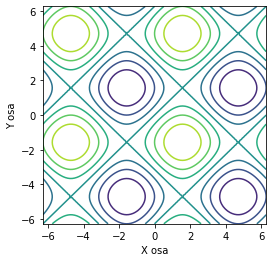

In [63]:
plt.figure(figsize=(4,4))
plt.contour(X,Y,Z)
plt.xlabel('X osa')
plt.ylabel('Y osa');

d) $z=(1-x^2)(1-y^2),$ B, VI 

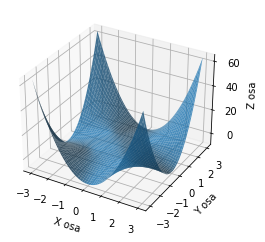

In [64]:
x=np.linspace(-3,3,100)
y=np.linspace(-3,3,100)
X,Y=np.meshgrid(x,y)
Z=(1-X**2)*(1-Y**2)

povrs = plt.figure(figsize=plt.figaspect(1))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,alpha=0.8);

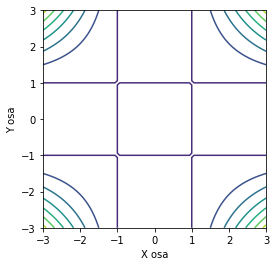

In [65]:
plt.figure(figsize=(4,4))
plt.contour(X,Y,Z)
plt.xlabel('X osa')
plt.ylabel('Y osa');

đ) $z=\dfrac{x-y}{1+x^2+y^2},$ D, V

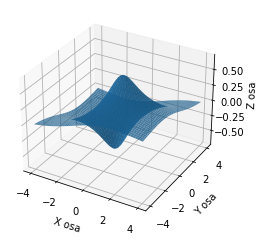

In [66]:
x=np.linspace(-4,4,100)
y=np.linspace(-4,4,100)
X,Y=np.meshgrid(x,y)
Z=(X-Y)/(1+X**2+Y**2)

povrs = plt.figure(figsize=plt.figaspect(1))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,alpha=0.8);

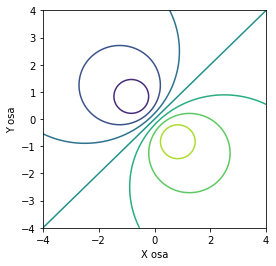

In [67]:
plt.figure(figsize=(4,4))
plt.contour(X,Y,Z)
plt.xlabel('X osa')
plt.ylabel('Y osa');

**Primer 14.** Naredba `contour` može da posluži i za crtanje implicitno zadatih funkcija u 2D. Recimo, kružnica data jednačinom $(x-1)^2+(y-3)^2=5\quad\Longleftrightarrow\quad (x-1)^2+(y-3)^2-5=0$ može da se prikaže sledećim kodom. 

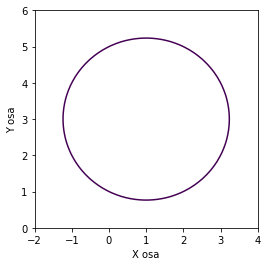

In [68]:
plt.figure(figsize=(4,4))
x=np.linspace(-2,4)
y=np.linspace(0,6)
X,Y=np.meshgrid(x,y)
Z=(X-1)**2+(Y-3)**2-5
plt.contour(X,Y,Z,[0])
plt.xlabel('X osa')
plt.ylabel('Y osa');

**Primer 15.** Analiziranje krivih oblika $v^TAv+b^Tv=c$ omogućava nam da razumemo grafike kvadratne funkcije po dve promenljive $z=p(x,y)=v^TAv+b^Tv,\ v=\begin{bmatrix}x&y\end{bmatrix}^T.$ Na osnovu rezultata analize krivih sledi da postoje tri moguća ponašanja znaka kvadratne funkcije $z=p(x,y).$ Ovi slučajevi prikazani su na slici.
<div>
   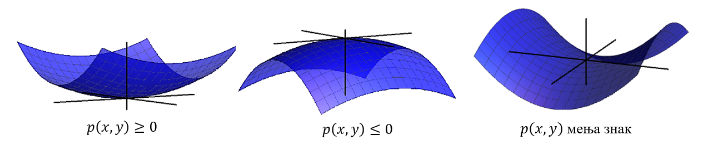  
</div>

Izraze $z=p(x,y)$ možemo smatrati specijalnim slučajem kvadratnih funkcija od tri promenljive $x,y$ i $z.$ Jednačina sa kvadratnom funkcijom opisuje koordinate skupa tačaka koje je zadovoljavaju. One mogu biti eksplicitno ili implicitno zadate. 
U $3D$ kvadratne forme i kvadratne funkcije od tri promenljive predstavljaju skupove tačaka koje zovemo [površi drugog reda](http://alas.matf.bg.ac.rs/~vsrdjan/files/geometrija8.pdf). Upoznaćemo njihove kanonske oblike.

Razmatramo prvo kanonske jednačine  površi drugog reda oblika 
$$s_1\dfrac{x^2}{a^2}+s_2\dfrac{y^2}{b^2}+s_3\dfrac{z^2}{c^2}=1,$$
gde je $s_k$ oznaka za znak odgovarajućeg sabirka. Njihov prostorni izgled analiziramo pomoću preseka sa ravnima 
$x=const,\ y=const$ i $z=const.$ Sistemi jednačina
$$\begin{cases}s_1\dfrac{x^2}{a^2}+s_2\dfrac{y^2}{b^2}+s_3\dfrac{z^2}{c^2}=1,\\
x=const\end{cases}\ 
\begin{cases}s_1\dfrac{x^2}{a^2}+s_2\dfrac{y^2}{b^2}+s_3\dfrac{z^2}{c^2}=1,\\
y=const\end{cases}\ 
\begin{cases}s_1\dfrac{x^2}{a^2}+s_2\dfrac{y^2}{b^2}+s_3\dfrac{z^2}{c^2}=1,\\
z=const\end{cases}$$
predstavljaju neku od krivih drugog reda koje smo prethodno analizirali.
U zavisnosti od izbora znaka  u jednačini površi vršimo sledeću klasifikaciju površi drugog reda:

**1.** [Elipsoid](https://en.wikipedia.org/wiki/Ellipsoid) u $3D$ ima jednačinu $\dfrac{x^2}{a^2}+\dfrac{y^2}{b^2}+\dfrac{z^2}{c^2}=1.$ Specijalno, kada je $a=b=c$ elipsoid postaje sfera.
<div>
   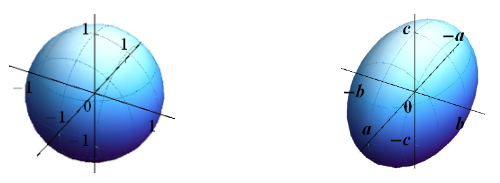  
</div>

**2.** [Hiperboloidi](https://sr.wikipedia.org/sr-ec/%D0%A5%D0%B8%D0%BF%D0%B5%D1%80%D0%B1%D0%BE%D0%BB%D0%BE%D0%B8%D0%B4) u $3D$ su dati jednačinama: 
$$\dfrac{x^2}{a^2}+\dfrac{y^2}{b^2}-\dfrac{z^2}{c^2}=1\qquad\mbox{ i }\qquad\dfrac{x^2}{a^2}-\dfrac{y^2}{b^2}-\dfrac{z^2}{c^2}=1.$$
Jednokrilni hiperboloidi sadrže jedan negativan znak, a dvokrilni imaju dva negativna znaka uz kvadratne članove.
<div>
   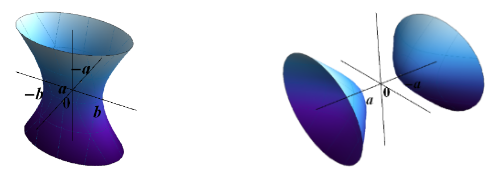  
</div>

**3.** Ukoliko dopustimo jednom od koeficijenata $a,b$ ili $c$ da uzme vrednost $\infty$ dobijamo [cilindričnu površ](https://en.wikipedia.org/wiki/Cylinder#Cylindrical_surfaces).
<div>
   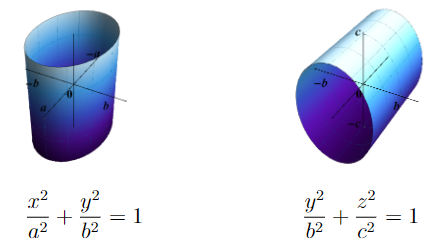  
</div>

**4.** Sledeća grupa kanonskih jednačina je oblika 
$$s_1\dfrac{x^2}{a^2}+s_2\dfrac{y^2}{b^2}+s_3\dfrac{z^2}{c^2}=0.$$
One ne predstavljaju tačku samo kada sadrže različite znakove, tj. kada figurišu i $+$ i $-$ u izrazu površi. Ovakvim jednačinama opisani su konusi.
<div>
   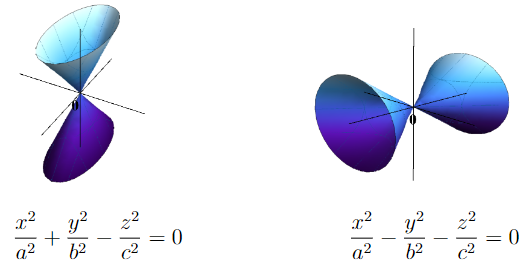  
</div>

Razmislite šta se dobija ukoliko neki od koeficijenata $a,b$ ili $c$ u jednačini $\dfrac{x^2}{a^2}+\dfrac{y^2}{b^2}-\dfrac{z^2}{c^2}=0$ uzme vrednost $\infty.$

**5.** Kvadratnim funkcijama u $3D$ oblika $z=\dfrac{x^2}{a^2}\pm\dfrac{y^2}{b^2}\,$  zadaju se [paraboloidi](https://en.wikipedia.org/wiki/Paraboloid). 
<div>
   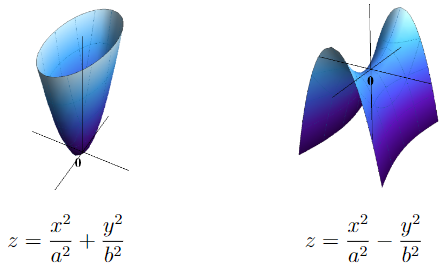  
</div>

Za matrični zapis kvadratnih funkcija u $3D$ takođe koristimo ranije opisan pristup. Tako npr. kvadratna funkcija
$$p(x,y,z)=4x^2+2y^2+4z^2-2xy-2xz+2y-2z+2,$$
ima matrični zapis
$$p(x,y,z)=\begin{bmatrix} x&y&z\end{bmatrix}
\begin{bmatrix} 4&-1&-1\\
-1&2&0\\ -1&0&4\end{bmatrix}
\begin{bmatrix} x\\y\\z\end{bmatrix}+\begin{bmatrix}0&2&-2\end{bmatrix}
\begin{bmatrix} x\\y\\z\end{bmatrix}+2
.$$


Kao i klasifikacija krivih u $2D$ i klasifikacija površi u $3D$ sprovodi se ortogonalnom dijagonalizacijom matrice kvadratne forme. Znak sopstvenih vrednosti ukazuje na tip površi u $3D$.

**Zadatak 3.** Odrediti glavne ose i klasifikovati površ drugog reda u 3D.

a) $x^2-y^2+z^2-4xy-4yz=1,\qquad$  b) $x^2+2y^2+z^2+2xy+2yz-4=0.$

**Rešenje :**

a) $x^2-y^2+z^2-4xy-4yz=1\quad\Longleftrightarrow
\begin{bmatrix} x&y&z\end{bmatrix}\begin{bmatrix}1&-2&0\\-2&-1&-2\\0&-2&1\end{bmatrix}
\begin{bmatrix} x\\y\\z\end{bmatrix}=1$

In [69]:
A=np.array([[1,-2.,0],[-2.,-1,-2],[0,-2,1]])
d,Q=np.linalg.eigh(A)   
print(np.round(d,3))
print(np.round(Q,3))

[-3.  1.  3.]
[[-0.408 -0.707 -0.577]
 [-0.816 -0.     0.577]
 [-0.408  0.707 -0.577]]


Zaključujemo da se radi o jednokrilnom hiperboloidu.

b) $x^2+2y^2+z^2+2xy+2yz-4=0\quad\Longleftrightarrow
\begin{bmatrix} x&y&z\end{bmatrix}\begin{bmatrix}1&1&0\\1&2&1\\0&1&1\end{bmatrix}
\begin{bmatrix} x\\y\\z\end{bmatrix}=4$

In [70]:
A=np.array([[1,1.,0],[1.,2,1],[0,1,1]])
d,Q=np.linalg.eigh(A)   
print(np.round(d,3))
print(np.round(Q,3))

[0. 1. 3.]
[[ 0.577 -0.707  0.408]
 [-0.577 -0.     0.816]
 [ 0.577  0.707  0.408]]


Zaključujemo da se radi o cilindričnoj površi.

**Zadatak 4.** Povezati jednačine i njihove grafike.
\begin{align}
&a)&&x^2+4y^2+9z^2=1,\qquad &&b)&&9x^2+4y^2+z^2=1,\qquad &&v)&&x^2-y^2+z^2=1,\\
&g)&&-x^2+y^2-z^2=1,\qquad &&d)&&y=2x^2+z^2,\qquad &&đ)&&y^2=x^2+2z^2,\\
&e)&&x^2+2z^2=1,\qquad &&ž)&&y=x^2-z^2.
\end{align}
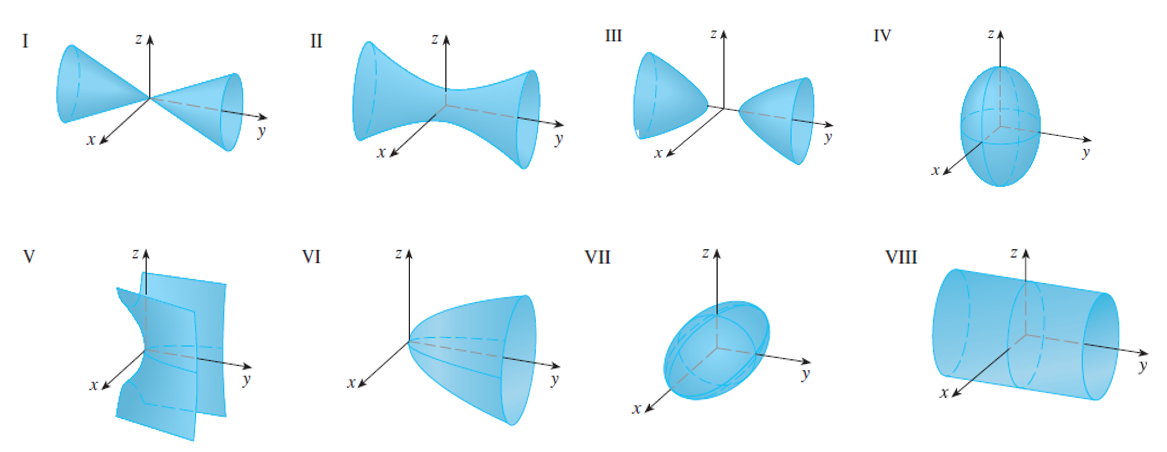

**Rešenje :**

a) $x^2+4y^2+9z^2=1,$ VII

Elipsoid sa najkraćom osom duž $z-$ose, a najdužom duž $x-$ ose.

C:\Users\jovan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


<IPython.core.display.Javascript object>


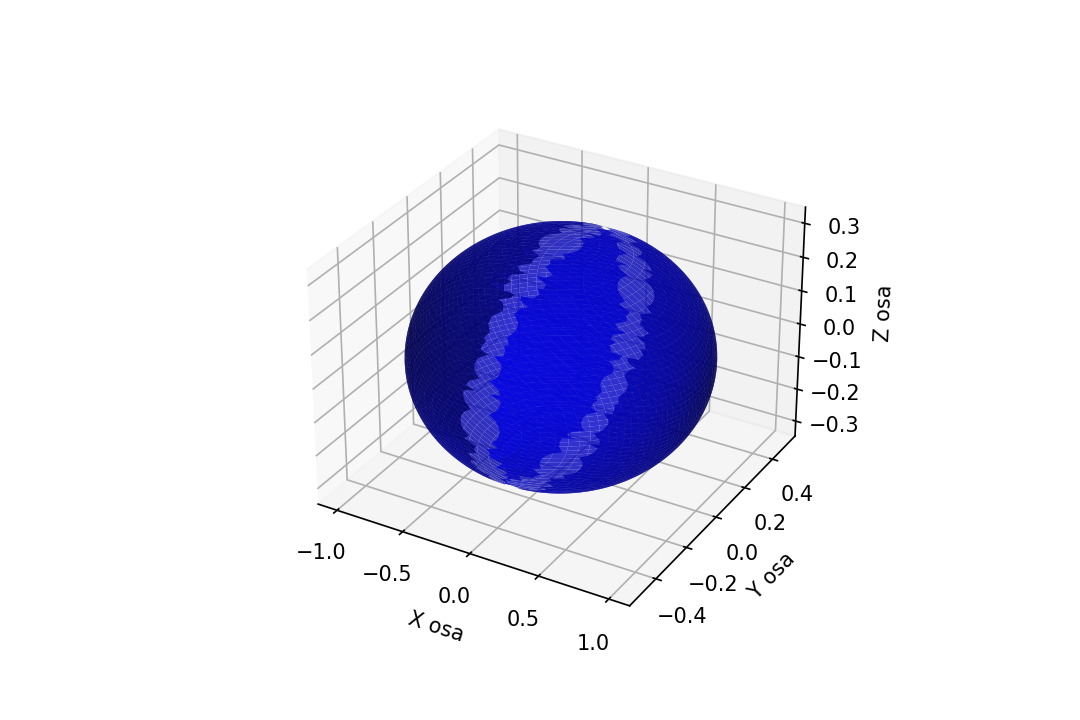

In [71]:
%matplotlib notebook
y=np.linspace(-1/2,1/2,200)
z=np.linspace(-1/3,1/3,200)
Y,Z=np.meshgrid(y,z)
X=np.sqrt(1-4*Y**2-9*Z**2)

povrs = plt.figure(figsize=plt.figaspect(2/3))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,color='b',alpha=0.8);
ax.plot_surface(-X,Y,Z,color='b',alpha=0.8);

b) $9x^2+4y^2+z^2=1,$ IV

Elipsoid sa najkraćom osom duž $x-$ose, a najdužom duž $z-$ ose.

C:\Users\jovan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


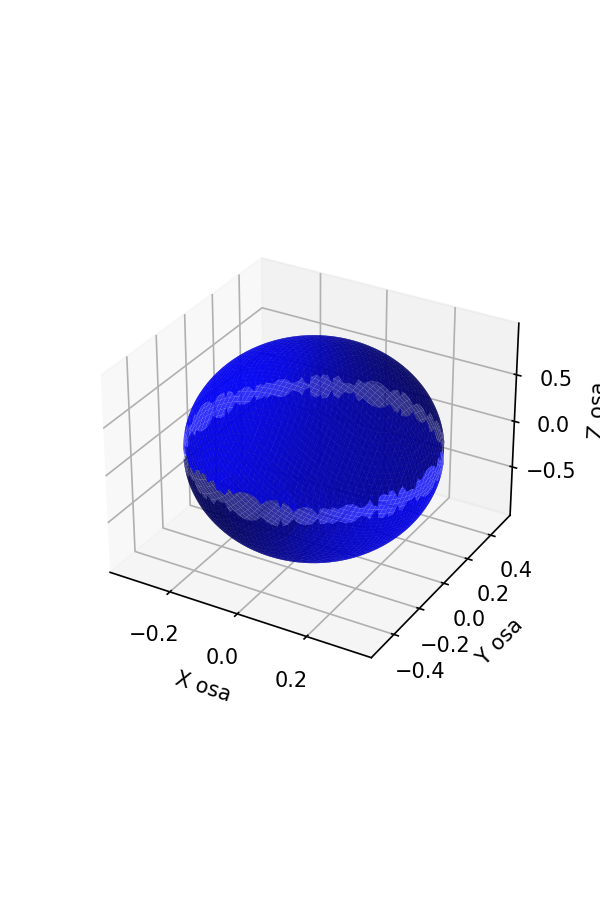

In [72]:
y=np.linspace(-1/2,1/2,200)
x=np.linspace(-1/3,1/3,200)
X,Y=np.meshgrid(x,y)
Z=np.sqrt(1-4*Y**2-9*X**2)

povrs = plt.figure(figsize=plt.figaspect(3/2))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,color='b',alpha=0.8);
ax.plot_surface(X,Y,-Z,color='b',alpha=0.8);

v) $x^2-y^2+z^2=1,$ II

Za svako fiksirano $y=c$ kriva nivoa postaje kružnica $x^2+z^2=1+c^2,$ poluprečnika ne manjeg od $1.$

C:\Users\jovan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


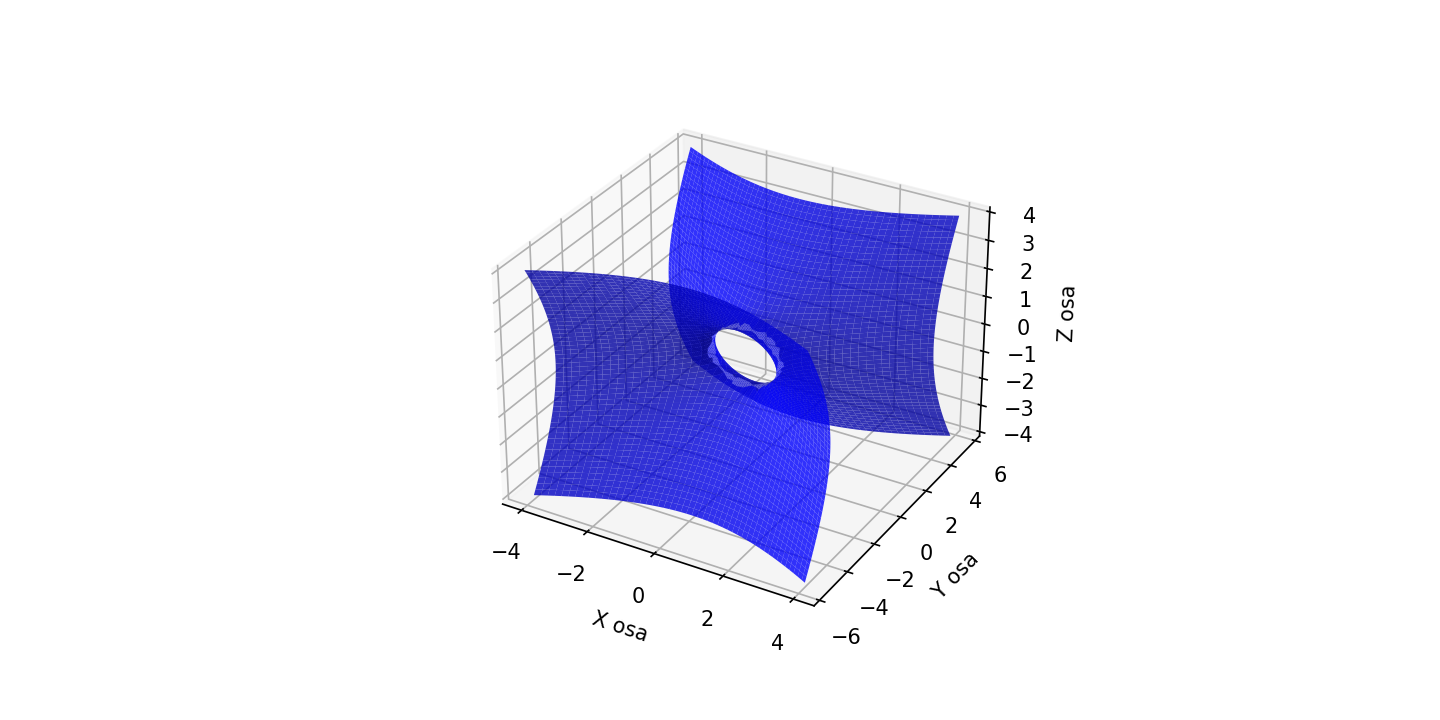

In [73]:
x=np.linspace(-4,4,200)
z=np.linspace(-4,4,200)
X,Z=np.meshgrid(x,z)
Y=np.sqrt(X**2+Z**2-1)

povrs = plt.figure(figsize=plt.figaspect(0.5))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,color='b',alpha=0.8);
ax.plot_surface(X,-Y,Z,color='b',alpha=0.8);

g) $-x^2+y^2-z^2=1,$ III

Oblast definisanosti jednačine je $|y|\geq1.$ To odgovara grafiku III.

<IPython.core.display.Javascript object>


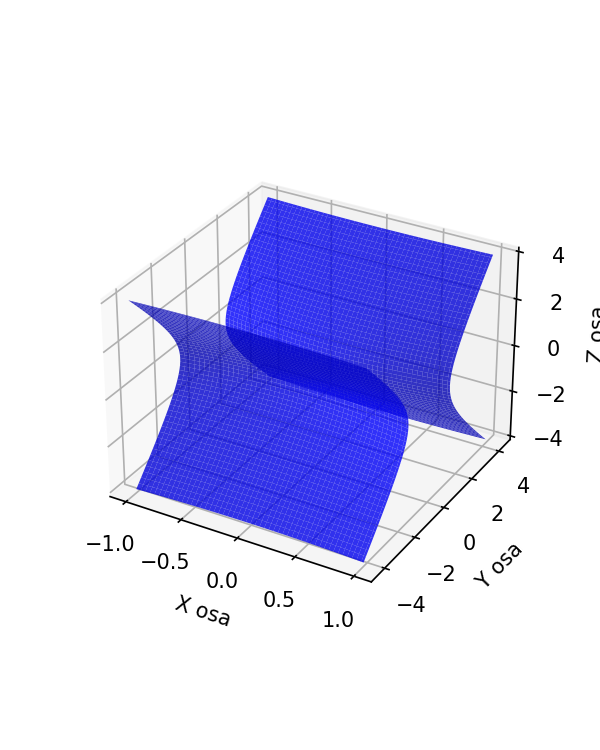

In [74]:
x=np.linspace(-1,1,100)
z=np.linspace(-4,4,100)
X,Z=np.meshgrid(x,z)
Y=np.sqrt(1+X**2+Z**2)

povrs = plt.figure(figsize=plt.figaspect(1.25))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,color='b',alpha=0.8);
ax.plot_surface(X,-Y,Z,color='b',alpha=0.8);

d) $y=2x^2+z^2,$ VI

Oblast definisanosti jednačine je $y\geq0.$ Za svako fiksirano $y=c$ konturna kriva predstavlja elipsu sa kraćom osom paralelnom $x-$osi.

<IPython.core.display.Javascript object>


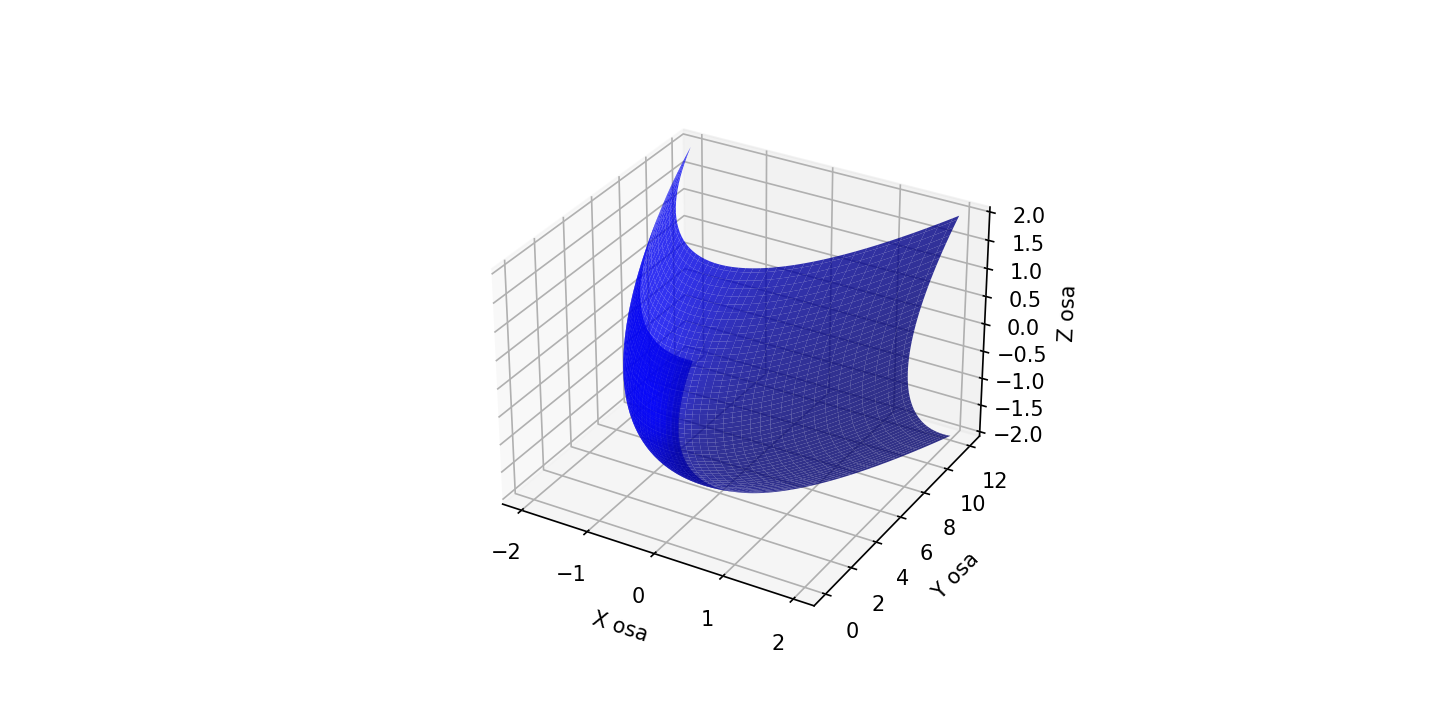

In [75]:
x=np.linspace(-2,2,100)
z=np.linspace(-2,2,100)
X,Z=np.meshgrid(x,z)
Y=2*X**2+Z**2

povrs = plt.figure(figsize=plt.figaspect(0.5))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,color='b',alpha=0.8);

đ) $y^2=x^2+2z^2,$ I

Jednačina je parna po sve tri promenljive, pa je i površ simetrična u odnosu na svaku koordinatnu osu. Osim toga, koordinatni početak očigledno zadovoljava jednačinu, pa pripada površi. Takođe, možemo da razmišljamo o konturnim krivama.

<IPython.core.display.Javascript object>


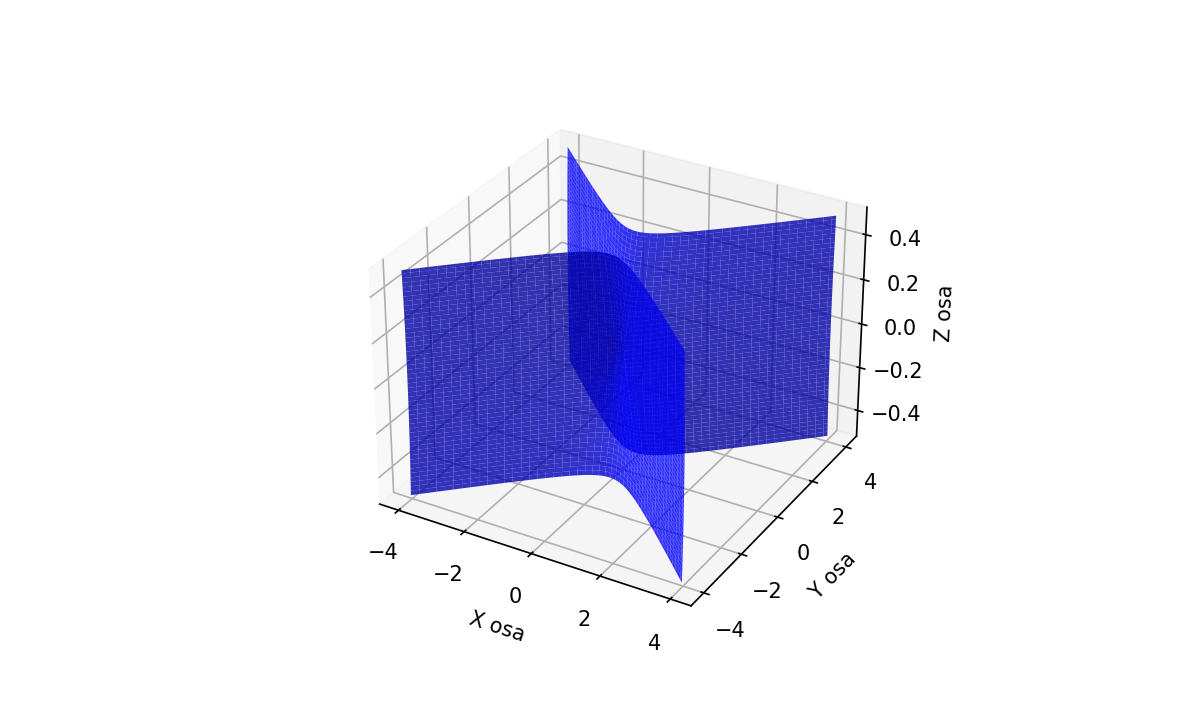

In [76]:
x=np.linspace(-4,4,100)
z=np.linspace(-4,4,100)
X,Z=np.meshgrid(x,y)
Y=np.sqrt(X**2+2*Z**2)

povrs = plt.figure(figsize=plt.figaspect(0.6))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,color='b',alpha=0.8);
ax.plot_surface(X,-Y,Z,color='b',alpha=0.8);

e) $x^2+2z^2=1,$ VIII

Za bilo koju vrednost $y$ koordinate površ presečena ravni $y=c$ predstavlja elipsu $\dfrac{x^2}{1}+\dfrac{z^2}{1/2}=1$ sa centrom u koordinatnom početku i kraćom stranom duž $z-$ose.

<IPython.core.display.Javascript object>


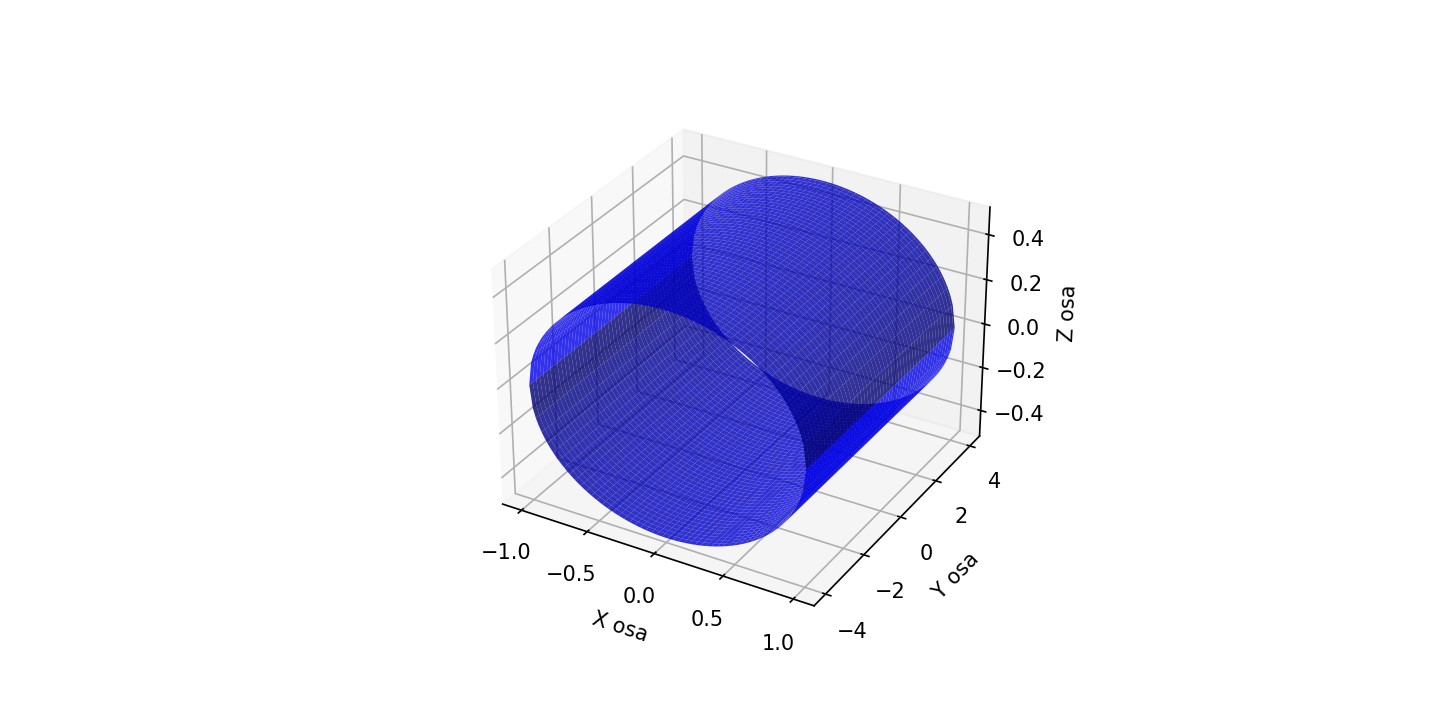

In [77]:
x=np.linspace(-1,1,100)
y=np.linspace(-4,4,100)
X,Y=np.meshgrid(x,y)
Z=np.sqrt(1-X**2)/2

povrs = plt.figure(figsize=plt.figaspect(0.5))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,color='b',alpha=0.8);
ax.plot_surface(X,Y,-Z,color='b',alpha=0.8);

ž) $y=x^2-z^2,$ V 

Za svako fiksirano $y=c$ površ postaje kriva $1=\dfrac{x^2}c-\dfrac{z^2}c$ što je jednačina hiperbole duž $x$ ili $z$ ose u zavisnosti od znaka $c.$ Ove karakzteristike uočavamo kod površi V.

<IPython.core.display.Javascript object>


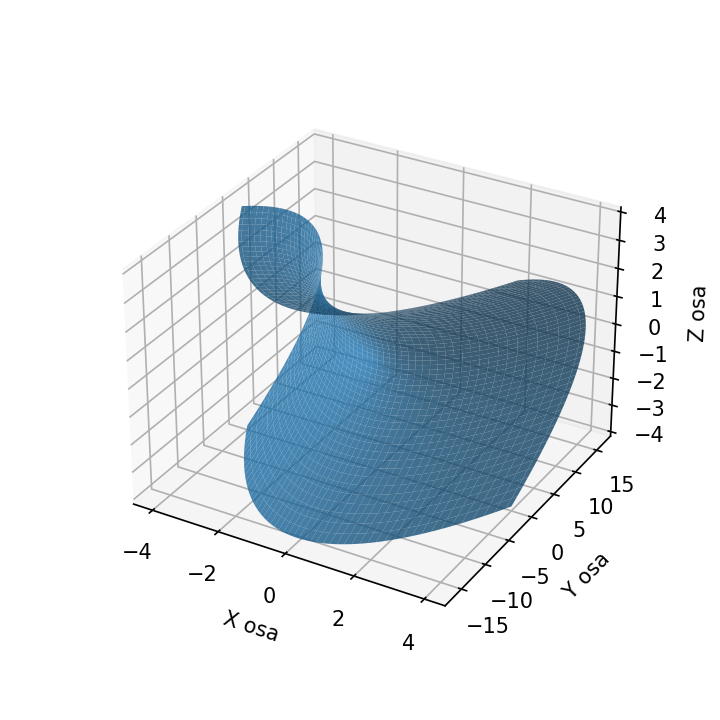

In [78]:
x=np.linspace(-4,4,100)
z=np.linspace(-4,4,100)
X,Z=np.meshgrid(x,z)
Y=X**2-Z**2

povrs = plt.figure(figsize=plt.figaspect(1))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,alpha=0.8);

**Primer 16.** Funkciju od tri promenljive $t=f(x,y,z)$ teško je zamisliti s obzirom da bi  grafički prikaz zahtevao 4 ose, tj. 4 dimenzije. Međutim, ideja sa krivama nivoa može da nam pomogne u sagledavanju izgleda ovakvih funkcija. Prikazaćemo nivoe funkcije $t=f(x,y,z)=x^2+y^2+z^2.$ Primetimo da $f(x,y,z)=c$ predstavlja implicitno zadatu površ, koju tada zovemo površ nivoa funkcije $f(x,y,z).$
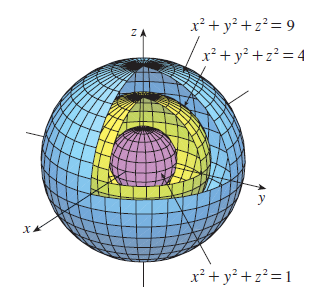

Prikazaćemo samo gornje delove ovih površi nivoa.

In [79]:
x=np.linspace(-3,3,300)
y=np.linspace(-3,3,300)
X,Y=np.meshgrid(x,y)
Xsq=X**2
Ysq=Y**2
nivo1=np.sqrt(1-Xsq-Ysq)
nivo4=np.sqrt(4-Xsq-Ysq)
nivo9=np.sqrt(9-Xsq-Ysq)

C:\Users\jovan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\jovan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\jovan\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


<IPython.core.display.Javascript object>


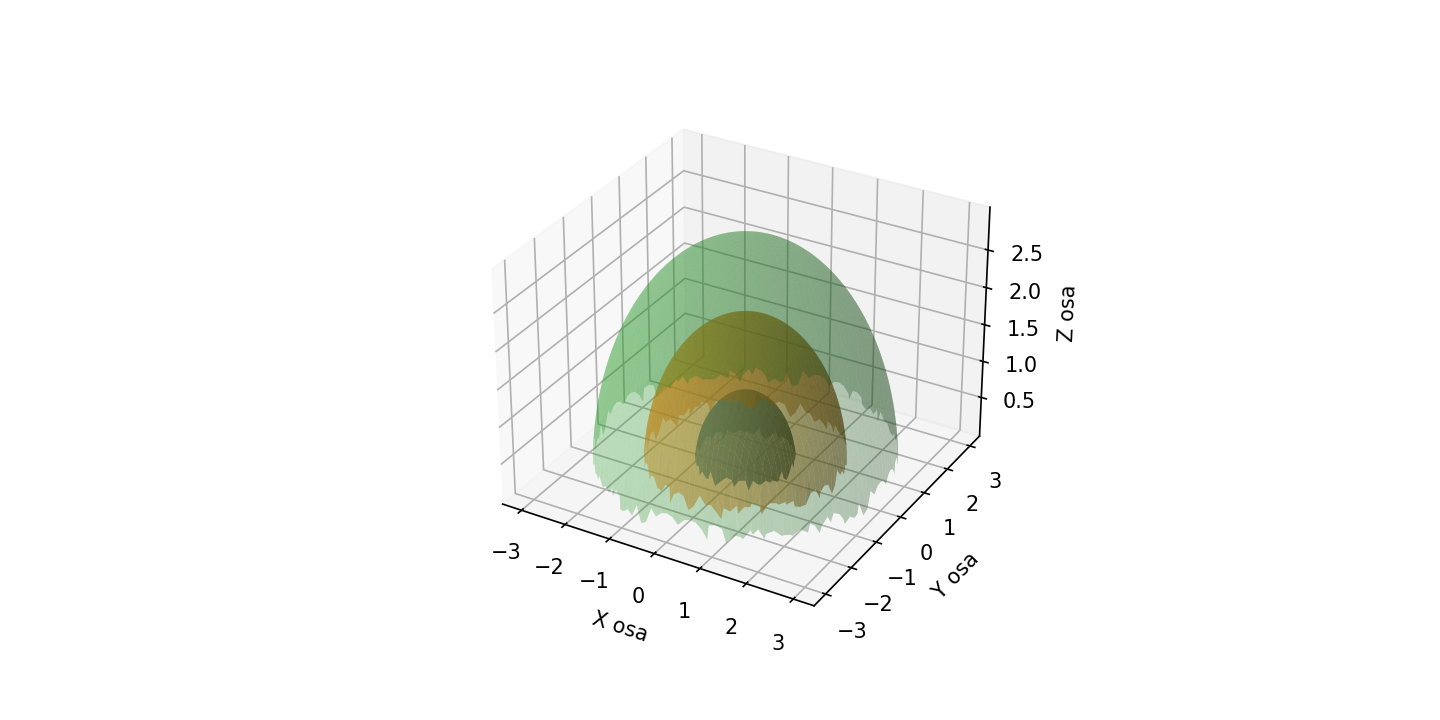

In [80]:
povrsi = plt.figure(figsize=plt.figaspect(0.5))
ax = povrsi.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,nivo1, alpha=0.8);
ax.plot_surface(X,Y,nivo4,alpha=0.5)
ax.plot_surface(X,Y,nivo9,alpha=0.3);

## Predstavljanje krive preko površi

**Primer 17.** Još jedan način za prikazivanje krivih u $3D$ jeste njihovim pozicioniranjem na nekoj površi ili presekom dve površi. Time se postiže grafičko razumevanje prostiranja tačaka sa krive. Tako upletena kubna funkcija $r(t)=\begin{bmatrix}t&t^2&t^3\end{bmatrix}^T,\qquad -2\leq t\leq2$ iz zadataka 2 može da se posmatra na nekoj  od dve cilindrične površi $y=x^2$ i $z=x^3,$ ili u njihovom preseku.

<IPython.core.display.Javascript object>


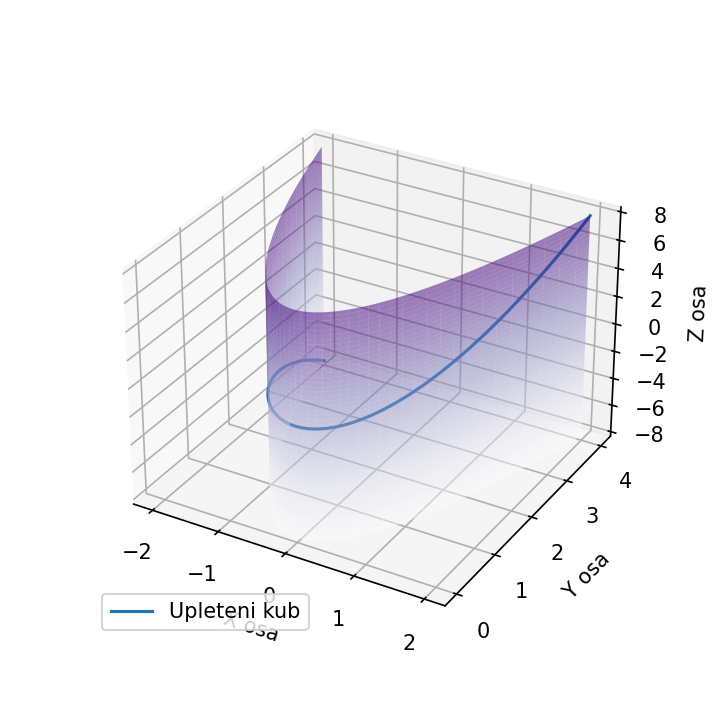

In [81]:
kubcil1 = plt.figure(figsize=plt.figaspect(1))
ax = kubcil1.add_subplot(projection='3d')
t = np.linspace(-2, 2, 200)
x = t
y = t**2
z = t**3
ax.plot(x, y, z, label='Upleteni kub',zorder=2)
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.legend(loc='lower left');
Z2=np.outer(np.linspace(-8,8,200),np.ones(200))
X2=np.outer(np.ones(200),x)
Y2=np.outer(np.ones(200),y)

ax.plot_surface(X2,Y2,Z2,cmap=cm.Purples, alpha=0.5);

<IPython.core.display.Javascript object>


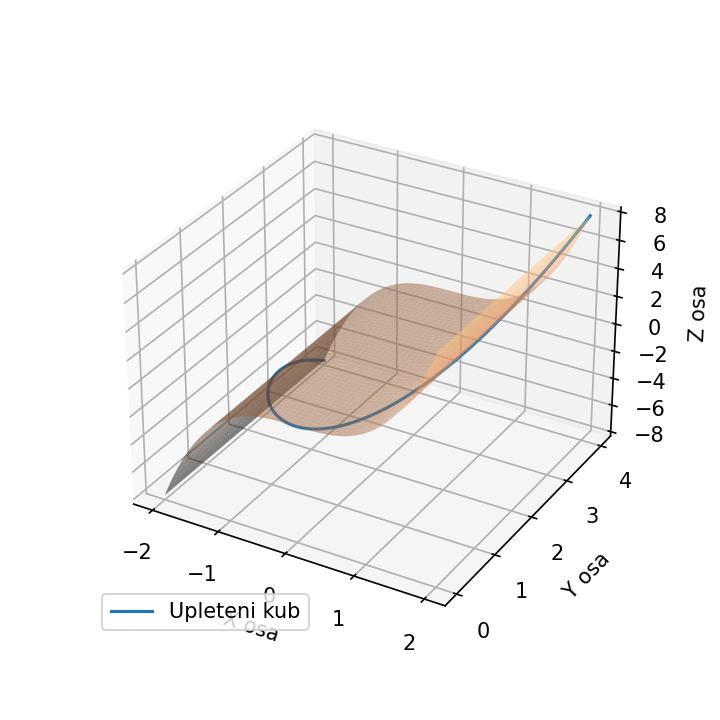

In [82]:
kubcil2 = plt.figure(figsize=plt.figaspect(1))
ax = kubcil2.add_subplot(projection='3d')
ax.plot(x, y, z, label='Upleteni kub',zorder=2)
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.legend(loc='lower left');
Y3=np.outer(np.linspace(0,4,200),np.ones(200))
X3=np.outer(np.ones(200),x)
Z3=np.outer(np.ones(200),z)

ax.plot_surface(X3,Y3,Z3,cmap=cm.copper, alpha=0.5);

<IPython.core.display.Javascript object>


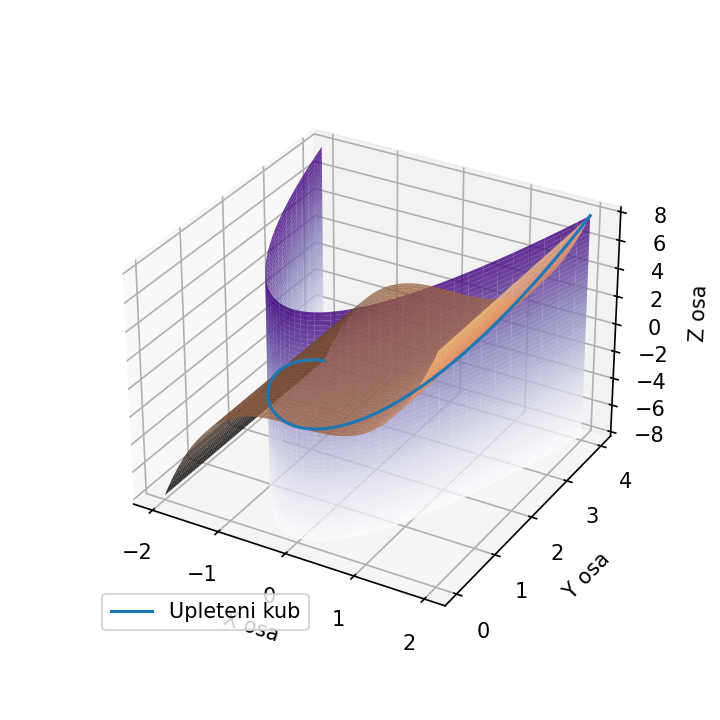

In [83]:
kubcil3 = plt.figure(figsize=plt.figaspect(1))
ax = kubcil3.add_subplot(projection='3d')
ax.plot(x, y, z, label='Upleteni kub',zorder=4)
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.legend(loc='lower left')
ax.plot_surface(X2,Y2,Z2,cmap=cm.Purples, alpha=0.8)
ax.plot_surface(X3,Y3,Z3,cmap=cm.copper, alpha=0.8);

**Zadatak 5.** Odrediti krivu koja predstavlja presek cilindra $x^2+y^2=1$ i ravni $\alpha:\ y+z=2.$
<div>
   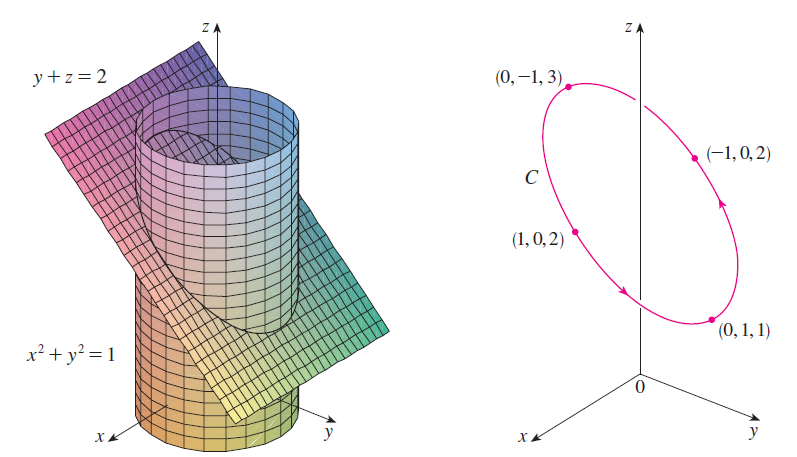  
</div>

**Rešenje :**

Parametarska jednačina cilindrične površi glasi $x=r\cos\theta,\ y=r\sin\theta,\quad r=1,\ \theta\in[0,2\pi)$ i $z=z.$ Zamenom ovih podataka u jednačinu ravni $\alpha:\ y+z=2$ dobijamo jednačinu tražene krive:
\begin{align}
&y+z=2\quad\Longleftrightarrow\quad z=2-y=2-\sin\theta,\\
&r(\theta)=\begin{bmatrix}\cos\theta&\sin\theta&2-\sin\theta\end{bmatrix}^T,\qquad \theta\in[0,2\pi).
\end{align}
Dobijena jednačina naziva se parametrizacija krive, a strelice na slici označavaju smer kretanja vrha vektora položaja $r(\theta)$ kako se vrednosti parametra $\theta$ povećavaju.